# Проект "Анализ оттока клиентов банка"

- Необходимо провести анализ клиентов банка и выделить сегменты, клиенты которых наиболее склонны к оттоку.
- Данный предоставляет отдел маркетинга банка «Метанпром»
- Данное исследование поможет отделу настроить эффективное воздействие на проблемные системы и уменьшить отток.
- Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

## Материалы

[Дашборд](https://public.tableau.com/app/profile/rostislav.zyryanov/viz/Banks_16987486456710/Dashboard1?publish=yes)


# Декомпозиция


1. Подготовить данные.
 - Загрузка библиотек, файла с данными.
 - Проведение предобработки:
    1. Обработка пропусков
    2. Поиск дубликатов
    3. Кодирование категориальных столбцов
    4. Корректировка типов и названий столбцов


2. Провести исследовательский анализ данных.
  - Составление потрета типичного клиента
  - Корреляционный анализ
  - Расчет доли оттока по банку
  - Анализ признаков в разрезе оттока:
    1. Анализ распределения непрерывных значений
    2. Анализ распределения категориальных значений
    3. Выявление признаков влияющих на отток, определение интервалов значений, связанных с оттоком.
  

3. Проверка гипотез:
  - Выбор и обоснование статистических критериев 
  - Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.
  - Формулировка и проверка дополнительных статистических гипотез относительно представленных данных, которые помогут внести ясность в исследование.
  

4. Сегментация
  - Выделение сегментов на основе установленных признаков
  - Определение доли оттока в сегментах и сравнение с общей долей оттока по банку.


5. Составление выводов и рекомендаций для заказчика

## Загрузка библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import plotly
import plotly.express as px
import phik

from plotly import graph_objects as go
from plotly.subplots import  make_subplots
!pip install -U kaleido==0.2.1 
import kaleido
import plotly.io as pio
pio.renderers.default = "png"

from scipy import stats as st

Загружаю датафрейм, затем гистограммы частот и описательные статистики

In [23]:
try:
    df = pd.read_csv('...')
except:
    df = pd.read_csv('...')

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


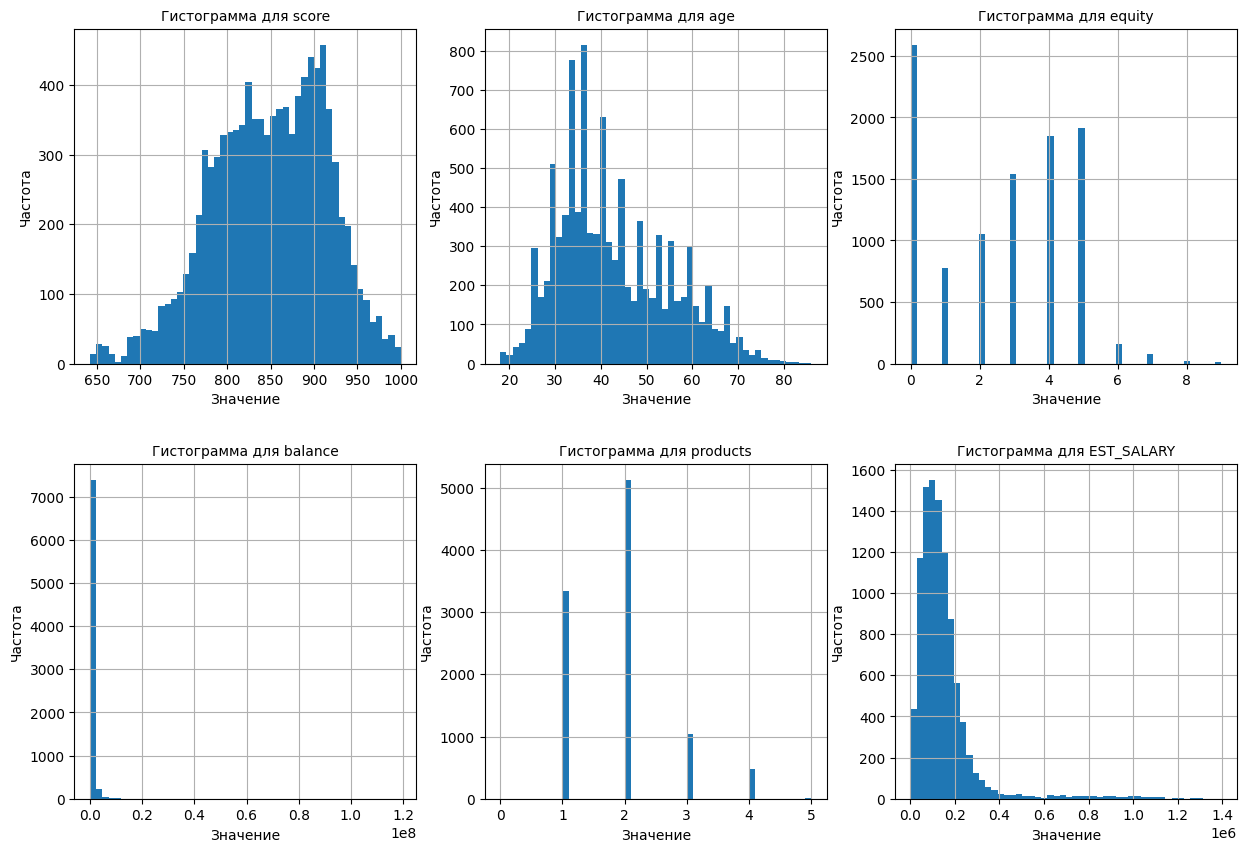

In [25]:
#Список столбцов с числовыми значениями
numeric_cols = df.drop(['USERID',
                        'churn',
                        'last_activity',
                        'credit_card'], axis = 1).select_dtypes(include=np.number).columns

# Разделение фигуру на 3 строки и 3 столбца
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Добавление графика гистограммы для каждого столбца
for i, col in enumerate(numeric_cols):
    axes[i // 3, i % 3].hist(df[col], bins = 50)
    axes[i // 3, i % 3].set_ylabel('Частота', fontsize=10)
    axes[i // 3, i % 3].set_xlabel('Значение', fontsize=10)

#     Проверить, чтобы индекс строки и столбца, по которым устанавливается заголовок, 
#     был меньше размера сетки по соответствующей оси
    if i // 3 < len(axes) and i % 3 < len(axes[0]):
        axes[i // 3, i % 3].set_title(f'Гистограмма для {col}', fontsize=10)
plt.subplots_adjust(hspace=0.3)
for ax in axes.flatten():
    ax.grid()
# Показать графики
plt.show()

In [26]:
df.drop('USERID', axis = 1).describe()

,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Предварительные выводы по числовым гистограммам:
- `score` - большинство клиентов имеют кредитный рейтинг в диапазоне 800-900 пунктов. Значений рейтинга ниже 642 нет.
- `age` - средний и медианный возрасты - 40-42 года.
- `equity` - преобладает нулевое значение баллов собственности, среднее и медиана различаются существенно - 2.62 и 4 соответственно. Клиентов с баллами выше 5 крайне мало.
- `balance` - есть нулевые значения, есть пропуски, которые необходимо обработать. 75% клиентов имеют баланс ниже 1 млн. рублей.
- `products` - Значения медианы и среднего находятся в районе 2. 
- `credit_card` - около 70% клиентов имеют кредитную карту.
- `last_activity` - активных клиентов чуть больше чем неактивных
- `est_salary` - медианный доход немного ниже среднего - 119 тыс. против 147 тыс.

## Предобработка

### Переименование столбцов

In [27]:
# Два названия столбцов приведу к общему виду - строчные буквы и разделение чертой.
df = df.rename(columns={"USERID": "user_id",
                        "EST_SALARY": "est_salary"})

### Проверка дубликатов

In [28]:
# Проверим дубликаты
df.duplicated().sum()

0

In [29]:
# Выводим дубликаты
dup = df.loc[df.duplicated(subset =['user_id'],keep = False)].sort_values(by = 'user_id').head(50)

# df.loc[duplicates]
dup.head(15)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


In [30]:
# проверим количество пользователей и количество ушедших
print('Количество клиентов:',dup.churn.count())
print('Количество ушедших клиентов:',dup.churn.sum())

Количество клиентов: 50
Количество ушедших клиентов: 20


In [31]:
# Проверим распределение по городам
dup.groupby('city').agg({'churn' : ['count','sum','mean']})

churn          
          count sum  mean
city                     
Рыбинск      25   9  0.36
Ярославль    25  11  0.44

Вывод:
 - Проверка неявных дубликатов выдала наличие 25 пар дубликатов по `user_id`. 
 - Наблюдается различие в значениях пола и возраста одинаковых номеров клиентов.
 - Зайдействованы два города - Ярославль и Рыбинск.
 - В большинстве случаев наблюдается ситуация, при которой в паре дубликатов есть и отток и удержание.
 - Смена городов в парах позволяет предположить, что клиенты закрывают счета в отделении в одном городе, а их номер потом присваивают новому клиенту. На это так же косвенно указывает разница в поле и возрасте.
 - Необходимо уточнить в банке, каким образом происходит переприсовение уникальных номеров, чтобы подтвердить гипотезу.
 - Дубликаты останутся.

### Проверка пропусков

In [32]:
# Проверим пропуски в датасете
display(pd.concat(
    [
        df.isna().sum(),
        df.isna().mean().apply('{:.4%}'.format)
    ], axis=1,
    keys=['nan_count', 'nan_share']
).sort_values(by='nan_count', ascending=False))

,nan_count,nan_share
balance,2295,22.9500%
age,26,0.2600%
user_id,0,0.0000%
score,0,0.0000%
city,0,0.0000%
gender,0,0.0000%
equity,0,0.0000%
products,0,0.0000%
credit_card,0,0.0000%
last_activity,0,0.0000%


Вывод:
- Всего два поля с пропусками - `balance` и `age`
- Значение пропусков `age` менее 0.5%, данные можно удалить.
- Значение пропусков `balance` около 23%, процент велик, к тому же пропуск в балансе может иметь влияние на отток, поэтому следует рассмотреть поподробнее в дальнейшем исследовании.

#### Обработка пропусков `age`

In [33]:
df = df.dropna(subset = ['age']).reset_index(drop = True)
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 935.2+ KB


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9969,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9970,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9971,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9972,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0
9973,96267,828.0,Рыбинск,Ж,58.0,3,1180886.70,4,0,1,21422.37,0


Индекс обновлен

#### Обработка пропусков `balance`

Посмотрим, что из себя представляют пропуски `balance`

In [34]:
# Проверим распределение по городам
df.query('balance.isna()').groupby('city')['user_id'].count()

city
Ростов        235
Рыбинск       586
Ярославль    1458
Name: user_id, dtype: int64

Задействованы все города, 63% клиентов приходится на Ярославль

In [35]:
# Посмотрим на дубликаты
print('Количество явных дубликатов:',df.query('balance.isna()').duplicated().sum())
print('Количество неявных дубликатов:',df['est_salary'].duplicated().sum())

Количество явных дубликатов: 0
Количество неявных дубликатов: 3


Всего 3 значения, а значит причина пропусков не в том, что часть данных случайно загружена в датасет дважды.

In [36]:
# Посмотрим как влияет отток
df.query('balance.isna()').groupby('churn')['churn'].count()

churn
0    2266
1      13
Name: churn, dtype: int64

Всего 13 отточных клиентов, что может означать отсутствие существенной связи между отсутствием средств на блалансе и оттоком.

In [37]:
# Проверим наличие нулевых значений в балансе
df.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3896,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6750,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


In [38]:
# Проверим показатели двух таблиц: исходной и с удаленными пропусками.

balance = df.dropna()
balance_isna = df.query('balance.isna()')

print('Исходная таблица')
display(df.drop(['churn','last_activity','gender','user_id','credit_card'],axis =1).describe())

print('Таблица с удаленными пропусками')
display(balance.drop(['churn','last_activity','gender','user_id','credit_card'],axis =1).describe())

Исходная таблица


,score,age,equity,balance,products,est_salary
count,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9.974000e+03
mean,848.682575,42.734409,2.630840,8.272456e+05,1.871466,1.477868e+05
std,65.399720,12.179971,1.979965,1.980327e+06,0.792729,1.392855e+05
min,642.000000,18.000000,0.000000,0.000000e+00,0.000000,2.546300e+03
25%,802.000000,33.000000,0.000000,2.956987e+05,1.000000,7.525166e+04
50%,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.196268e+05
75%,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.744998e+05
max,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.395064e+06


Таблица с удаленными пропусками


,score,age,equity,balance,products,est_salary
count,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7.695000e+03
mean,843.744120,42.924366,3.394802,8.272456e+05,2.081222,1.245204e+05
std,55.342539,12.244010,1.584817,1.980327e+06,0.757446,1.046671e+05
min,689.000000,18.000000,0.000000,0.000000e+00,1.000000,2.546300e+03
25%,801.000000,33.000000,2.000000,2.956987e+05,2.000000,6.755698e+04
50%,840.000000,40.000000,4.000000,5.242953e+05,2.000000,1.062502e+05
75%,882.000000,52.000000,5.000000,9.800512e+05,2.000000,1.551446e+05
max,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.395064e+06


In [39]:
print('Процент оттока по банку до удаления пропусков:',round((df.churn.mean()*100),2),'%')  
print('Процент оттока по банку после удаления пропусков:',round((balance.churn.mean()*100),2),'%')  
print('Разница:',round((balance.churn.mean()*100 - df.churn.mean()*100),2),'п.п.')

Процент оттока по банку до удаления пропусков: 18.24 %
Процент оттока по банку после удаления пропусков: 23.47 %
Разница: 5.23 п.п.


In [40]:
print('Количество лояльных клиентов до удаления пропусков')
print(df[df['churn']==1]['user_id'].count())
print('Количество отточных клиентов до удаления пропусков')
print(df[df['churn']==0]['user_id'].count())
print('Количество лояльных клиентов после удаления пропусков')
print(balance[balance['churn']==1]['user_id'].count())
print('Количество отточных клиентов после удаления пропусков')
print(balance[balance['churn']==0]['user_id'].count())

Количество лояльных клиентов до удаления пропусков
1819
Количество отточных клиентов до удаления пропусков
8155
Количество лояльных клиентов после удаления пропусков
1806
Количество отточных клиентов после удаления пропусков
5889


Если удалить все строки с пропущенными значениями, то вот как будет выглядеть данный по сравнению с таблицей с пропусками
- Средний кредитный рейтинг уменьшился на 3 балла или на 0,6% , медианный - на 15 баллов или на 1,5%
- Возраст не изменился
- Баллы оценки собственности повысились по обоим показателям примерно на 1 балл.
- Количество продуктов так же не изменилось
- Средний оценочный доход снизился примерно на 15%, медианный уменьшился примерно на 11%.
- При этом процент оттока по банку после удаления пропусков увеличился на 5 процентных пунктов.

Есть нулевые значения баланса, при этом клиенты не отточные. 

Вывод:
- Предположение, что пропуски связаны с оттоком, не подтверждается, так как из 2279 значений всего 13 имеют признак оттока.
- Наличие нулевых значений в балансе в датасете говорит о том, что на месте пропусков изначально были определенные значения.
- Отсутствие дубликатов(всего 3) не подтерждает теорию, что данные загружены по ошибке дважды.
- Возможной причиной пропусков может являться то, что исходный датасет собирался по частям и некоторые части данных таблиц могли не войти в конечный датасет
- При сравнении показателей до удаления пропусков и после выясняется, что средние и медианные показатели некоторых признаков либо не меняются, либо меняются незначительно. 
- Удаление пропусков увеличивает общий процент оттока по банку за счет того, что из датасета выпадают в абсолютном большинстве лояльные клиенты (из более чем 2000 клиентов выпало всего 12 отточных).
- Можно предположить, что клиенты с пропущенными значениями - новые клиенты, которые еще не успели пополнить счета.
- Процет пропусков велик. больше 20%. Несмотря не небольшую разницу значений, удалять столь большой массив данных нельзя.

Необходимо обратиться в банк за уточнением механизмов формирования данных. Возможно после консультации появится возможность либо заполнить пропуски, либо удалить их. На данный момент пропуски оставляем.

### Кодирование типов данных столбцов

In [41]:
# Заменяем значения пола на числа с проверкой

print("Значения до замены:") 
print(df['gender'].value_counts())

#замена значений "М" на 1, "Ж" на 0:
df.loc[df['gender']=='М', 'gender'] = 1
df.loc[df['gender']=='Ж','gender'] = 0

#приведем к типу данных int:
df['gender'] = df['gender'].astype(int)
print() 
print("Значения после замены:") 
print(df['gender'].value_counts())

Значения до замены:
М    4991
Ж    4983
Name: gender, dtype: int64

Значения после замены:
1    4991
0    4983
Name: gender, dtype: int64


In [42]:
# Убедимся, что в столбцах age и score нет десятичных дробных чисел.
display(df.age.unique())
df.score.unique()

array([25., 37., 30., 51., 34., 56., 39., 38., 54., 67., 52., 41., 31.,
       28., 35., 42., 45., 53., 40., 43., 47., 48., 61., 62., 36., 26.,
       27., 60., 72., 50., 46., 55., 58., 71., 44., 49., 33., 32., 66.,
       29., 68., 73., 69., 59., 21., 65., 57., 63., 80., 24., 70., 77.,
       64., 23., 20., 18., 19., 78., 74., 76., 22., 75., 83., 82., 81.,
       84., 79., 86.])

array([ 850.,  861.,  892.,  866.,  730.,  856.,  807.,  825.,  923.,
        906.,  927.,  921.,  845.,  837.,  815.,  731.,  829.,  793.,
        876.,  922.,  772.,  896.,  871.,  732.,  898.,  806.,  766.,
        776.,  868.,  946.,  828.,  786.,  944.,  863.,  822.,  794.,
        924.,  811.,  814.,  956.,  935.,  826.,  849.,  901.,  893.,
        792.,  888.,  831.,  748.,  820.,  860.,  914.,  930.,  948.,
        789.,  737.,  812.,  933.,  809.,  749.,  873.,  859.,  950.,
        937.,  835.,  768.,  767.,  785.,  846.,  750.,  816.,  894.,
        891.,  788.,  758.,  787.,  821.,  855.,  779.,  791.,  838.,
        971.,  797.,  841.,  915.,  985.,  870.,  897.,  763.,  774.,
        686., 1000.,  875.,  819.,  869.,  854.,  810.,  761.,  802.,
        958.,  917.,  745.,  736.,  908.,  928.,  884.,  853.,  780.,
        726.,  881.,  975.,  852.,  965.,  899.,  890.,  836.,  818.,
        880.,  795.,  916.,  775.,  902.,  918.,  842.,  771.,  895.,
        801.,  721.,

In [43]:
# Данные возраста и скоринга приведем к целочисленному типу для удобства визуализаций.
df['score'] = df['score'].astype(int)
df['age'] = df['age'].astype(int)

In [44]:
# Методом get_dummies кодируем столбец с городами.
# Столбец city копируем, чтобы не исчез после кодирования
df['town']=df['city'].copy()
df = pd.get_dummies(df, columns=['city'], drop_first= False )
df.head(5)

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,town,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850,0,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,0,1,0
1,146556,861,0,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,0,1,0
2,120722,892,0,30,0,NaN,1,1,1,107683.34,0,Рыбинск,0,1,0
3,225363,866,0,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,0,0,1
4,157978,730,1,34,5,174.00,1,1,0,67353.16,1,Ярославль,0,0,1


In [45]:
# Переименовываем полученные столбцы
df = df.rename(columns={"city_Ростов": "city_ros",
                        "city_Рыбинск": "city_rib",
                        "city_Ярославль": "city_yar",
                        "town": "city"})
df.head(5)

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city,city_ros,city_rib,city_yar
0,183012,850,0,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,0,1,0
1,146556,861,0,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,0,1,0
2,120722,892,0,30,0,NaN,1,1,1,107683.34,0,Рыбинск,0,1,0
3,225363,866,0,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,0,0,1
4,157978,730,1,34,5,174.00,1,1,0,67353.16,1,Ярославль,0,0,1


In [46]:
df.head()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city,city_ros,city_rib,city_yar
0,183012,850,0,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,0,1,0
1,146556,861,0,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,0,1,0
2,120722,892,0,30,0,NaN,1,1,1,107683.34,0,Рыбинск,0,1,0
3,225363,866,0,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,0,0,1
4,157978,730,1,34,5,174.00,1,1,0,67353.16,1,Ярославль,0,0,1


### Проверка столбца `products`

При просмотре сведений о продуктах выясянется, что есть клиеты, которые не пользуются продуктами банка.

In [47]:
df.query('products < 1')

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city,city_ros,city_rib,city_yar
8939,147837,962,0,79,3,NaN,0,0,0,25063.96,1,Рыбинск,0,1,0


Все значения параметров, связанные с услугами банка, у клиента нулевые. Значение оттока положительное, что может означать прекращение его обслуживания.
Так как клиент всего один с таким значением, в будущем его значение оттока будет сильно искажать общую картину, поэтому данные удалю.

In [48]:
df = df.query('products != 0').reset_index(drop = True)
df

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city,city_ros,city_rib,city_yar
0,183012,850,0,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,0,1,0
1,146556,861,0,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,0,1,0
2,120722,892,0,30,0,NaN,1,1,1,107683.34,0,Рыбинск,0,1,0
3,225363,866,0,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,0,0,1
4,157978,730,1,34,5,174.00,1,1,0,67353.16,1,Ярославль,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,120553,814,1,27,1,78144.65,1,0,1,18943.64,0,Рыбинск,0,1,0
9969,139170,894,1,46,0,NaN,1,1,0,196898.29,0,Ярославль,0,0,1
9970,115639,903,1,24,0,NaN,2,1,1,108905.09,0,Ярославль,0,0,1
9971,148700,777,0,68,3,865457.97,3,0,1,86874.90,0,Ярославль,0,0,1


## EDA

#### Функции 

Ниже представлены несколько функций. написанных для упрощения кода

In [49]:
# Столбчатая диграмма
def grph_1(table):
    

    return (px.bar(
                    (table.pivot_table(index = ind,
                                       values=val,
                                       aggfunc = agg)
                          .sort_values(by = sort_by,
                                       ascending = asc).head(x)

                    ),text_auto='.3s',width=w, height=h
                )

            .update_layout(title=tit,
                           xaxis_title=x_tit,
                           yaxis_title=y_tit,
                           xaxis=x_ax,
                           showlegend=False
                          )
           )



# Функция которая выведет табличку со значениями оттока по каждой категории внутри признака.
# А так же визуализацию этой таблицы с указанием значения общего оттока по банку.
def churn(column, name):
    name = df.pivot_table (index = column, 
                           values = 'churn', 
                           aggfunc = ['sum', 'count'])
    name.columns = name.columns.droplevel(level=1)
    name['perc'] = round((name['sum']/name['count']*100),2)
    name.sort_values('perc', ascending = False).head(20)
    
    
    return  name, (px.bar(name['perc'],
                         text_auto='.3s',
                         width=800, 
                         height=500)
                      .update_layout(title=tit,
                                     xaxis_title=x_tit,
                                     yaxis_title='Процент ушедших клиентов, %',
                                     showlegend=False
                                    ).add_hline(y=18.2, line_dash="dash", line_color="red")
                                     .add_annotation(x=xx,
                                                     y=18.2,
                                                     text="18.2%",
                                                     xanchor="left", 
                                                     yanchor="bottom",
                                                     font_size=14,
                                                     showarrow=False
                                                     )
                  )

# Данные функции выведут таблицы со статистиками значения оттока в каждом признаке
# Медианы для дискретных значений, средние - для непрерывных, мода - для городов
def median_churn(column):
    q_1 = df.query('churn == 0')[column].median()
    q_2 = df.query('churn == 1')[column].median()
    combined_values = pd.DataFrame({"Отток": ["Не ушёл", "Ушёл"],"Медиана": [q_1, q_2]})
    return combined_values

def mean_churn(column):
    q_1 = round((df.query('churn == 0')[column].mean()),2)
    q_2 = round((df.query('churn == 1')[column].mean()),2)
    combined_values = pd.DataFrame({"Отток": ["Не ушёл", "Ушёл"],"Среднее": [q_1, q_2]})
    return combined_values

def city_churn(column):
    q_1 = df.query('churn == 0')[column].mode()
    q_2 = df.query('churn == 1')[column].mode()
    combined_values = pd.DataFrame({"Отток": ["Не ушёл", "Ушёл"],"Город": [q_1, q_2]})
    return combined_values

# Функция для визуализации непрерывх признаков
def tables(dr, column, hue=None):
        plt.figure(figsize=(20, 6))
        sns.histplot(data=dr, x=column, hue=hue, stat = stat, common_norm = False, legend = True,kde=False);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 20, color = 'black')
        plt.xlabel("Значения", fontsize=15, color="black")
        plt.ylabel("Распределение", fontsize=15, color="black")
        mean = dr[column].mean()
        median = dr[column].median()
        plt.axvline(mean, color='red', linestyle='--')
        plt.axvline(median, color='yellow', linestyle='--')
        plt.legend(legend, loc='upper right')
        plt.show()


Для составления портретов отточных и не отточных клиентов следуем следующему плану:
- Посмотрим, как количественно распределены клиенты по катигориям внутри признака
- Рассмотрим средние, медианы, а так же моду значений признаков.
- Посмотрим, как в процентном соотоношении распределены клиенты в разрезе оттока

Для начала посмотрим общую долю оттока по банку

### Общая доля оттока по банку

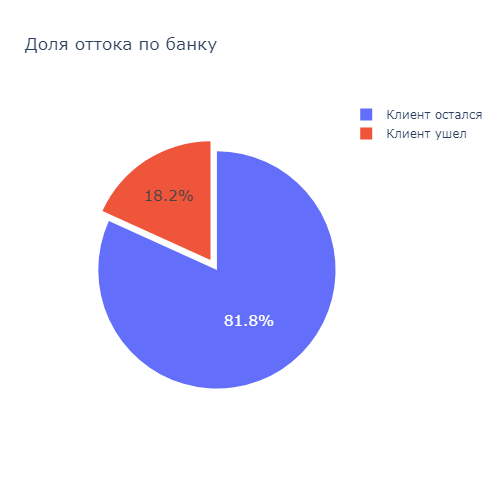

In [50]:
churn_all = (pd.DataFrame(df['churn'].value_counts()).reset_index()
         )
churn_all.loc[churn_all['index']==1, 'index'] = 'Клиент ушел'
churn_all.loc[churn_all['index']==0,'index'] = 'Клиент остался'
fig = go.Figure(data=[go.Pie(labels=churn_all['index'],
                             values=churn_all['churn'],
                             pull = [0.1, 0]
                            )
                     ]
               )
fig.update_layout(title='Доля оттока по банку',
                  width=500,
                  height=500,
                  showlegend=True,
                            )
fig.update_traces(textposition='inside',
                  textfont_size=15,
                  textinfo='percent',
                  )

fig.show()

- Общая доля оттока составляет около 18%. 
- При определении сегментов будем придерживаться условия, что отток сегмента должен быть в минимум в 2 раза выше, чем по банку

### Анализ признаков

Рассмотрим каждый признак следующим образом
- Распределение клинетов по категориям внутри признака
- Значение выбранной статистики для определения отточных категорий
- Рассмотрение процентное соотношение категорий внутри признака и сравнение с общим значением оттока по банку.

#### `gender`

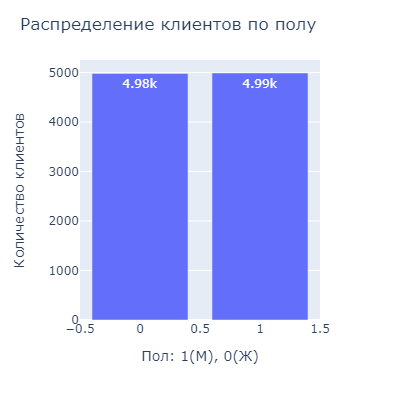

In [51]:
ind = 'gender'
val = 'user_id'
agg = 'count'
sort_by = 'gender'
asc = True
tit = 'Распределение клиентов по полу'
x_tit= 'Пол: 1(М), 0(Ж)'
y_tit='Количество клиентов'
x_ax = {'categoryorder':'total ascending'}
x = 100
col = None
w = 400
h = 400
#{'categoryorder':'total descending'}
grph_1(df)


Половое распределение примерно одинаковое, разница между полами составялет 0.04% в пользу мужчин

In [52]:
# Теперь посмотрим, какой пол преобладает у отточных клиентов и оставшихся.
median_churn('gender')

,Отток,Медиана
0,Не ушёл,0.0
1,Ушёл,1.0


Мужчины более склонны к оттоку.

Ниже посмотрим как отток распределяется по полу в процентном соотношении.

,sum,count,perc
gender,,,
1,1183,4991,23.70
0,635,4982,12.75


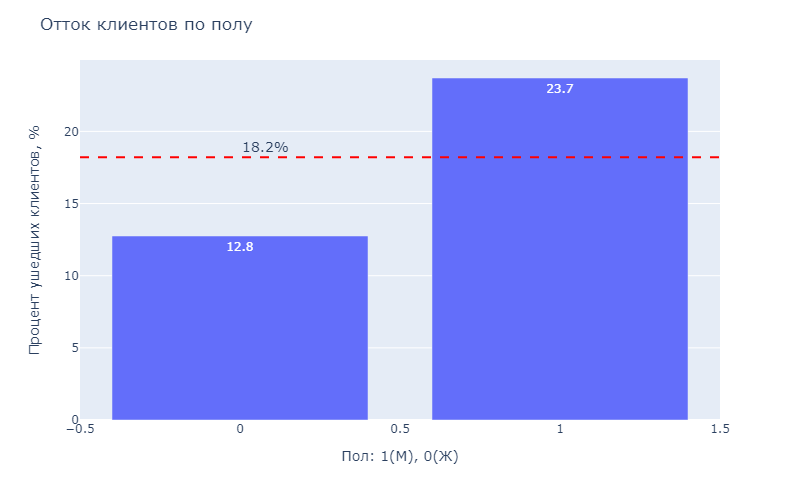

In [53]:
legend =  ['м','ж']
xx = 0
tit = 'Отток клиентов по полу'
x_tit = 'Пол: 1(М), 0(Ж)'
table, graph = churn('gender', "gender_churn")
display(table.sort_values('perc', ascending = False))
graph

При равномерном половом распределении отток мужчин почти в 2 раза выше, чем женщин.

__Вывод:__

- При практически равномерном распределении клиентов по полу, мужчины более склонны к оттоку
- Доля оттока мужчин составляет около 24%, что вдвое больше уровня оттока у женщин.

#### `age`

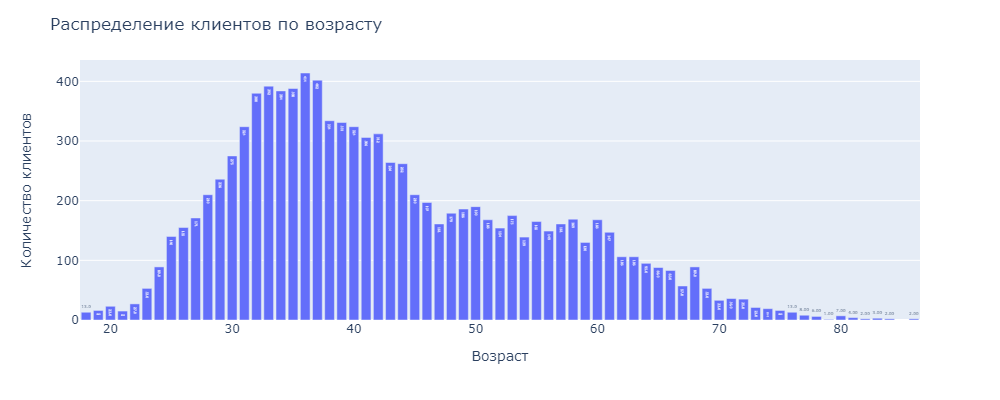

In [54]:
ind = 'age'
val = 'user_id'
agg = 'count'
sort_by = 'age'
asc = True
tit = 'Распределение клиентов по возрасту'
x_tit='Возраст'
y_tit='Количество клиентов'
x_ax = {'categoryorder':'total ascending'}
x = 100
w = 1000
h = 400
col = None
#{'categoryorder':'total descending'}
grph_1(df)

- Самая многочисленная возрастная группа клиентов банка - 30-40 лет.
- В группе 50-60 лет количество клиентов с увеличением возраста уменьшается без резких колебаний.
- В группе до 30 наблюдается рост числа клиентов с увеличением возраста, после 70 наблюдается снижение числа клиентов.

In [55]:
display(median_churn('age'))
mean_churn('age')

,Отток,Медиана
0,Не ушёл,40.0
1,Ушёл,39.0


,Отток,Среднее
0,Не ушёл,43.02
1,Ушёл,41.43


Среднее значения возрастов в обеих категориях немного выше медианы. Ниже посомтрим на распределение оттока по возрасту.

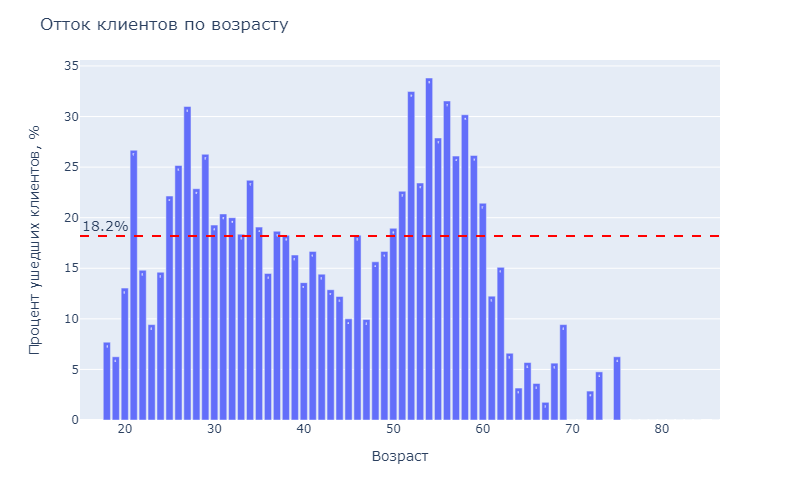

In [56]:
xx = 15
tit = 'Отток клиентов по возрасту'
x_tit = 'Возраст'
table, graph = churn('age', "age_churn")
graph

По данным графика можено выделить определенные возрастные группы с высоким процентов оттока.
- 25-34 лет
- 50-60 лет

C малым оттоком можно выделить группы
- 40-50 лет
- 60-70 лет

При этом выделется высокий процент оттока во возрасте 21 года. 
Если обратиться к таблице, то можно отметить, что высокий отток обусловлен малым количеством клиентов в данных категориях.


In [57]:
table.query('perc > 18').sort_values('count')

,sum,count,perc
age,,,
21,4,15,26.67
59,34,130,26.15
54,47,139,33.81
25,31,140,22.14
56,47,149,31.54
52,50,154,32.47
26,39,155,25.16
57,42,161,26.09
55,46,165,27.88


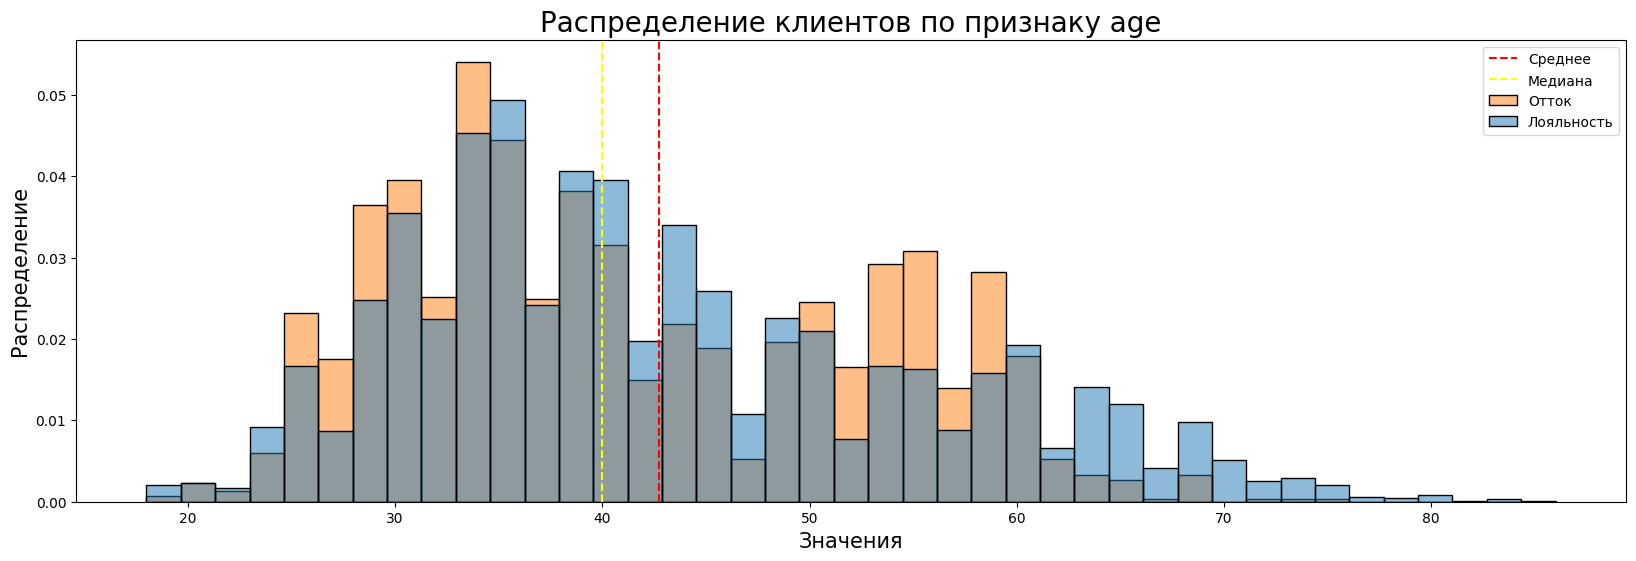

In [58]:
legend = ['Среднее','Медиана','Отток', 'Лояльность']
stat = 'density'
tables(df,'age', hue = 'churn') 

#### `equity`

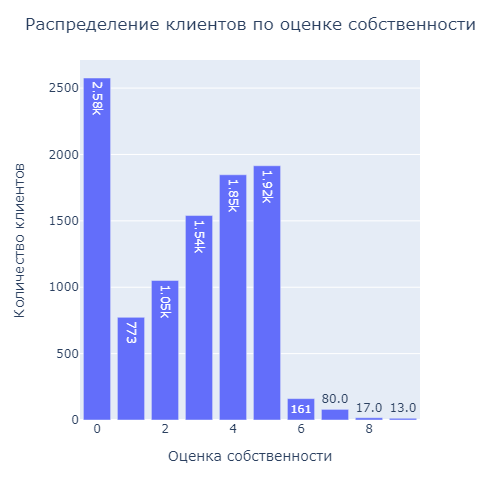

In [59]:
ind = 'equity'
val = 'user_id'
agg = 'count'
sort_by = 'equity'
asc = True
tit = 'Распределение клиентов по оценке собственности'
x_tit='Оценка собственности'
y_tit='Количество клиентов'
x_ax = {'categoryorder':'total ascending'}
x = 100
col = None
w = 500
h = 500
#{'categoryorder':'total descending'}
grph_1(df)


- Почти четверть клиентов имеют оценку 0, что может означать либо отсутствие какой либо собственности у клиента, либо отсутствие информации о ней у банка.
- Клиенты с оценкой равной 6 и выше составляют в сумме всего 2,7% от общего числа клиентов.
- Около 53% клиентов имеют оценку от 3 до 5 включительно.

In [60]:
# Посмотрим, как распредел
median_churn('equity')

,Отток,Медиана
0,Не ушёл,3.0
1,Ушёл,4.0


In [61]:
mean_churn('equity')

,Отток,Среднее
0,Не ушёл,2.38
1,Ушёл,3.76


Медиана и среднее приблизительно дают одну и ту же каартину: лояльными остаются клиенты с оценкой 3, уходят обладатели оценки 4

,sum,count,perc
equity,,,
0,90,2576,3.49
1,93,773,12.03
2,166,1051,15.79
3,321,1540,20.84
4,464,1847,25.12
5,576,1915,30.08
6,58,161,36.02
7,37,80,46.25
8,6,17,35.29


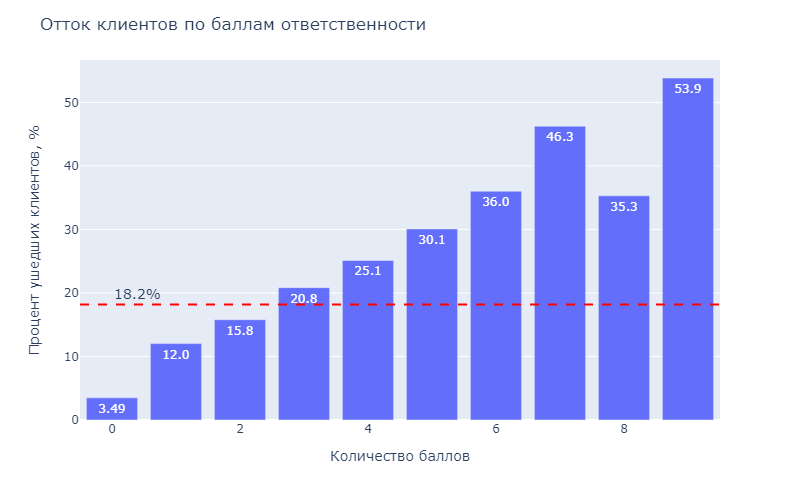

In [62]:
# Проверим
xx=0
tit = 'Отток клиентов по баллам ответственности'
x_tit = 'Количество баллов'
table, graph = churn('equity', "equity_churn")
display(table)
graph

In [63]:
print('Медиана ушедших при баллах ниже 6 - ' ,df.query('equity < 6 and churn == 1')['equity'].median())
print('Медиана оставшихся при баллах ниже 6 - ' ,df.query('equity < 6 and churn == 0')['equity'].median())

Медиана ушедших при баллах ниже 6 -  4.0
Медиана оставшихся при баллах ниже 6 -  2.0


Самая большая группа клиентов - с нулевой оценкой - имеет самый маленький процент оттока, в то время как малочисленные группы с оценкой 6 и выше имеют большой процент. При фильтрации клиентов с баллами ниже 6, наиболее лояльными остаются клиенты с оценкой 2, в то время как наименее лояльные остаются с оценкой 4

#### `city`

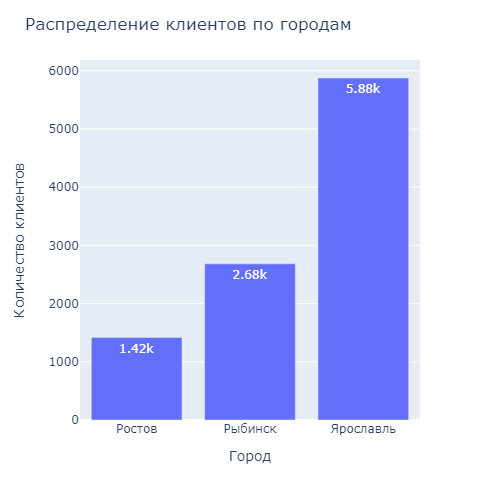

In [64]:
ind = 'city'
val = 'user_id'
agg = 'count'
sort_by = 'city'
asc = True
tit = 'Распределение клиентов по городам'
x_tit='Город'
y_tit='Количество клиентов'
x_ax = {'categoryorder':'total ascending'}
x = 100
col = None
w = 500
h = 500
#{'categoryorder':'total descending'}
grph_1(df)

Около 60% клиентов банка находятся в Ярославле

In [65]:
q_1 = df.query('churn == 0')['city'].mode()
q_2 = df.query('churn == 1')['city'].mode()
combined_values = pd.DataFrame({"Отток": ["Не ушёл", "Ушёл"],"Город": [q_1[0], q_2[0]]})
combined_values

,Отток,Город
0,Не ушёл,Ярославль
1,Ушёл,Ярославль


Самым популярным значением среди городов в разрезе оттока ожидаемо является Ярославль.

,sum,count,perc
city,,,
Ярославль,1117,5875,19.01
Ростов,265,1416,18.71
Рыбинск,436,2682,16.26


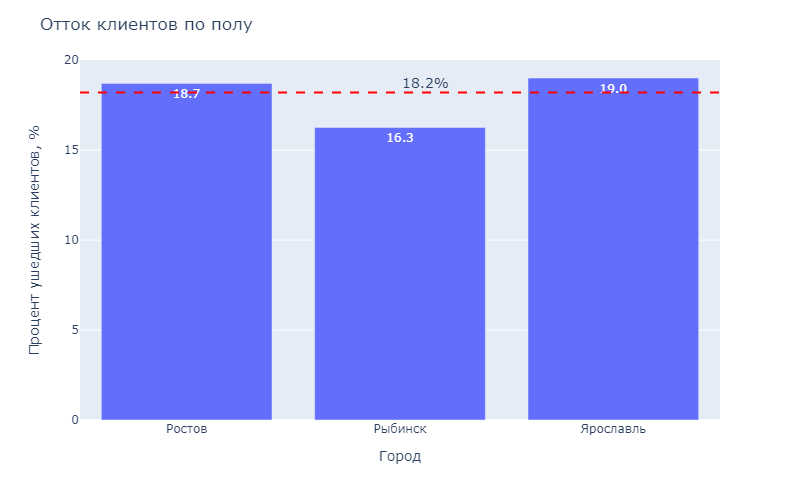

In [66]:
xx = 1
tit = 'Отток клиентов по полу'
x_tit = 'Город'
table, graph = churn('city', "gender_churn")
display(table.sort_values('perc', ascending = False))
graph

- Несмотря на большую разницу в количестве клиентов, самая большая разница в оттоке между городами составляет всего 2.7 процентных пункта
- Ярославль лидирует по оттоку с 19%, в то время как самый малочисленный Ростов остает всего 0.3 процентных пункта.


#### `products`

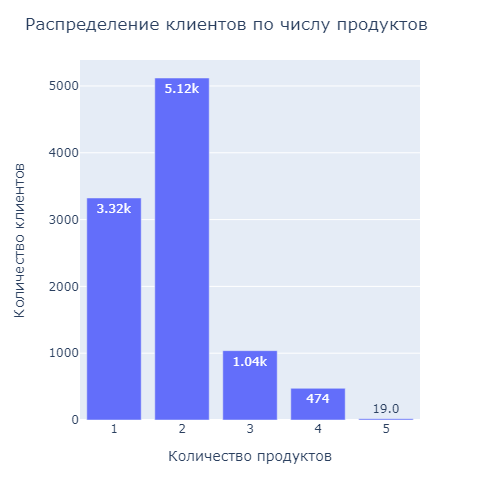

In [67]:
ind = 'products'
val = 'user_id'
agg = 'count'
sort_by = 'products'
asc = True
tit = 'Распределение клиентов по числу продуктов'
x_tit='Количество продуктов'
y_tit='Количество клиентов'
x_ax = {'categoryorder':'total ascending'}
x = 100
col = None
w = 500
h = 500
#{'categoryorder':'total descending'}
grph_1(df)

In [68]:
df.query('products == 0 or products == 5')

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city,city_ros,city_rib,city_yar
401,187761,868,0,19,4,8126.88,5,1,1,85323.98,0,Ярославль,0,0,1
523,195914,852,0,39,5,1388255.70,5,1,1,135432.48,1,Ярославль,0,0,1
893,132781,820,1,37,5,259677.16,5,1,1,124261.01,0,Ярославль,0,0,1
1019,122402,833,1,32,3,234560.94,5,1,1,106033.79,0,Ростов,1,0,0
1345,159649,847,0,39,1,137974.02,5,1,1,219672.26,0,Ярославль,0,0,1
1478,209431,882,1,42,4,1142013.06,5,1,0,101051.78,1,Рыбинск,0,1,0
1879,134758,850,0,35,4,282262.33,5,1,1,105312.07,0,Ярославль,0,0,1
3270,155765,863,1,30,5,1036114.50,5,1,1,150744.50,1,Ярославль,0,0,1
3805,191408,838,1,28,2,99461.51,5,1,1,88641.84,0,Ростов,1,0,0
3880,138642,823,0,37,1,118329.87,5,1,1,105095.05,0,Ярославль,0,0,1


In [69]:
# - Есть 1 клиент, у которого продуктов банка нет. 
# У него так же стоит факт оттока, что говорит о том, 
# что возможно все операции по прекращению обслуживания 
# данного клиента будут завершены в ближайшее время.

Большинство клиентов используют 1 или 2  продукта банка. 

- Также присутствует 19 клиентов, имеюищх максмальный пакет продуктов. В большинстве своем клиенты лояльны банку, из Ярославля, минимум с кредитной картой и активные.

In [70]:
median_churn('products')

,Отток,Медиана
0,Не ушёл,2.0
1,Ушёл,2.0


За счет своей большой численности, медианные показатели лояльности в категориях оттока сходятся на клиентах, использующих 2 продукта.
Рассмотрим процент оттока по всем категорим продуктов в разрезе оттока:

,sum,count,perc
products,,,
1,235,3323,7.07
2,978,5119,19.11
3,297,1038,28.61
4,300,474,63.29
5,8,19,42.11


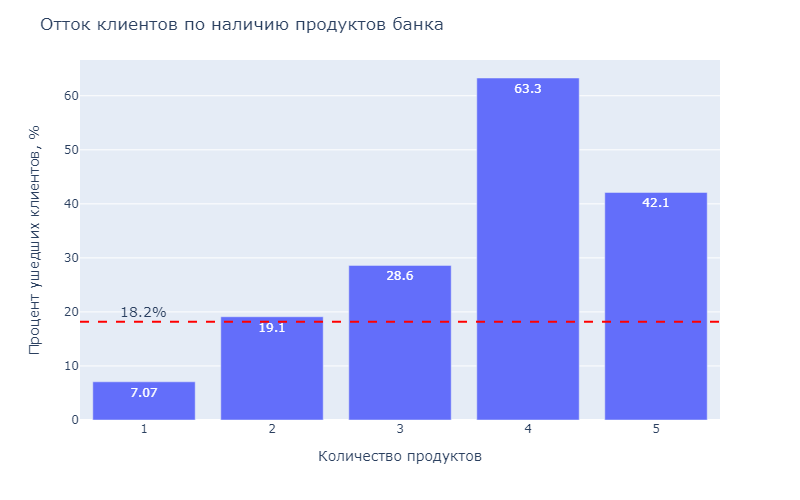

In [71]:
xx = .8
tit = 'Отток клиентов по наличию продуктов банка'
x_tit = 'Количество продуктов'
table, graph = churn('products', "products_churn")
display(table)
graph

- Самый большой процент оттока показывают клиенты с 4 и 5 продуктами банка.
- В то же время самая многочисленная группа с 2мя продуктами имеет всего 19% оттока, что на 1 процентный пункт выше, чем по банку.

#### `credit_card`

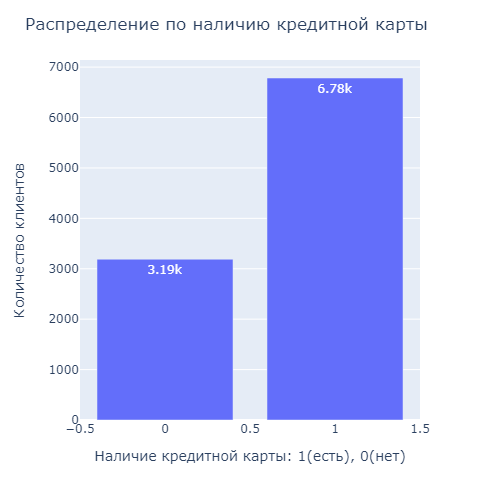

In [72]:
ind = 'credit_card'
val = 'user_id'
agg = 'count'
sort_by = 'credit_card'
asc = True
tit = 'Распределение по наличию кредитной карты'
x_tit='Наличие кредитной карты: 1(есть), 0(нет)'
y_tit='Количество клиентов'
x_ax = {'categoryorder':'total ascending'}
x = 100
col = None
w = 500
h = 500
#{'categoryorder':'total descending'}
grph_1(df)

In [73]:
print('Клиентов с кредитной картой, но без продуктов банка:',df.query('credit_card == 1 \
                                                                       and products == 0').user_id.count())

Клиентов с кредитной картой, но без продуктов банка: 0


Кредитную карту имеют как минимум 69% клиентов. Логической нестыковки между наличием карты и отсутствием продуктов нет.

In [74]:
median_churn('credit_card')

,Отток,Медиана
0,Не ушёл,1.0
1,Ушёл,1.0


Клиенты с картой могут быть как лояльны, так и не лояльны. Проверим на графике распрделение оттока.

,sum,count,perc
credit_card,,,
0,815,3189,25.56
1,1003,6784,14.78


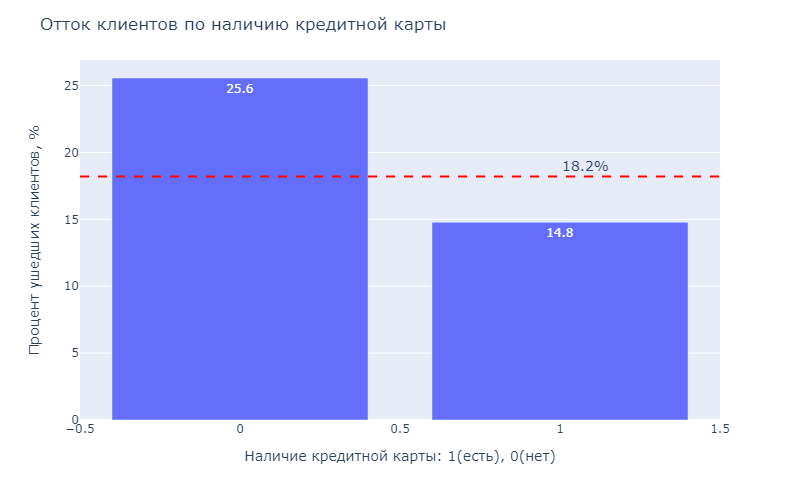

In [75]:
xx = 1
tit = 'Отток клиентов по наличию кредитной карты'
x_tit = 'Наличие кредитной карты: 1(есть), 0(нет)'
table, graph = churn('credit_card', "credit_card_churn")
display(table)
graph

Процент оттока держателей карты в 1.7 раз ниже, чем у клиентов без карты. Наличие кредитной карты означает обязательства по ее погашению, что возможно является удерживающей причиной.

#### `last_activity`

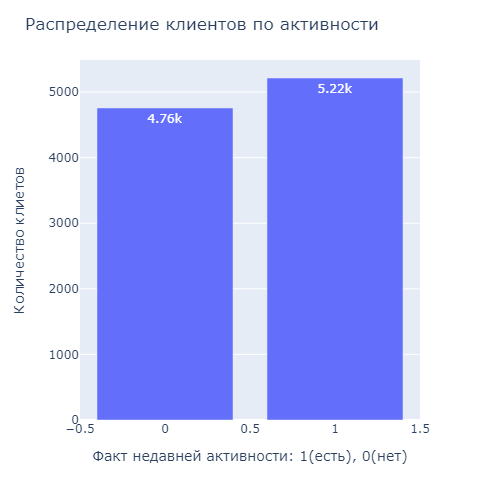

In [76]:
ind = 'last_activity'
val = 'user_id'
agg = 'count'
sort_by = 'last_activity'
asc = True
tit = 'Распределение клиентов по активности'
x_tit='Факт недавней активности: 1(есть), 0(нет)'
y_tit='Количество клиетов'
x_ax = {'categoryorder':'total ascending'}
x = 100
col = None
w = 500
h = 500
#{'categoryorder':'total descending'}
grph_1(df)

In [77]:
median_churn('last_activity')

,Отток,Медиана
0,Не ушёл,0.0
1,Ушёл,1.0


Значение медианы говорит о том, что ушедшие клиенты в основном имели недавнюю активность. Возможно это связано с мероприятиями по прекращению обслуживания, например закрытие счетов.

,sum,count,perc
last_activity,,,
0,541,4758,11.37
1,1277,5215,24.49


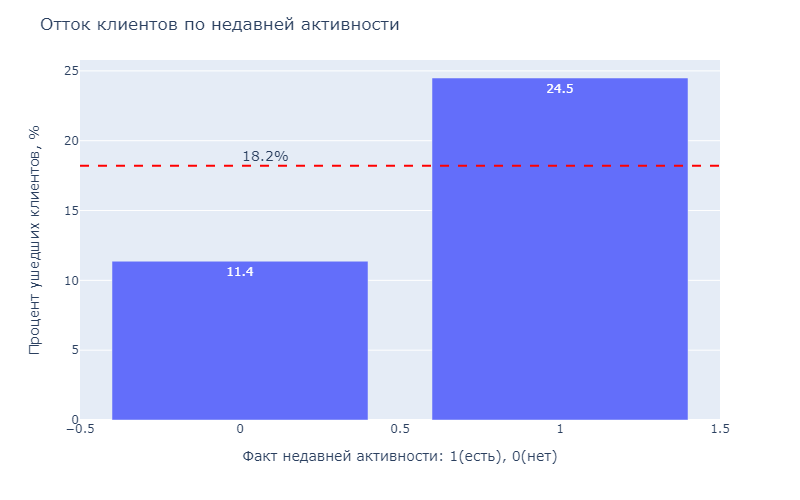

In [78]:
xx = 0
tit = 'Отток клиентов по недавней активности'
x_tit = 'Факт недавней активности: 1(есть), 0(нет)'
table, graph = churn('last_activity', "activity_churn")
display(table)
graph

- Подверждается гипотеза о том, что ушедшие клиенты были активные в недавнем времени. 
- Процент оттока актвных клиентов более чем в 2 раза превышает показтель оттока неактвных.

#### `balance`

*Функция для отображения в п. 3.0.1*

Для просмотра распределения балансов удобнее отделить большой хвост и рассмотреть отдельно каждый график.

Деление балансов произведу следующим образом:
- до 1 млн. включительно;
- от 1 и до 5 млн. включительно;
- свыше 5 млн.

Желтой линией на графике обозначу медианное значение, красной - среднее.

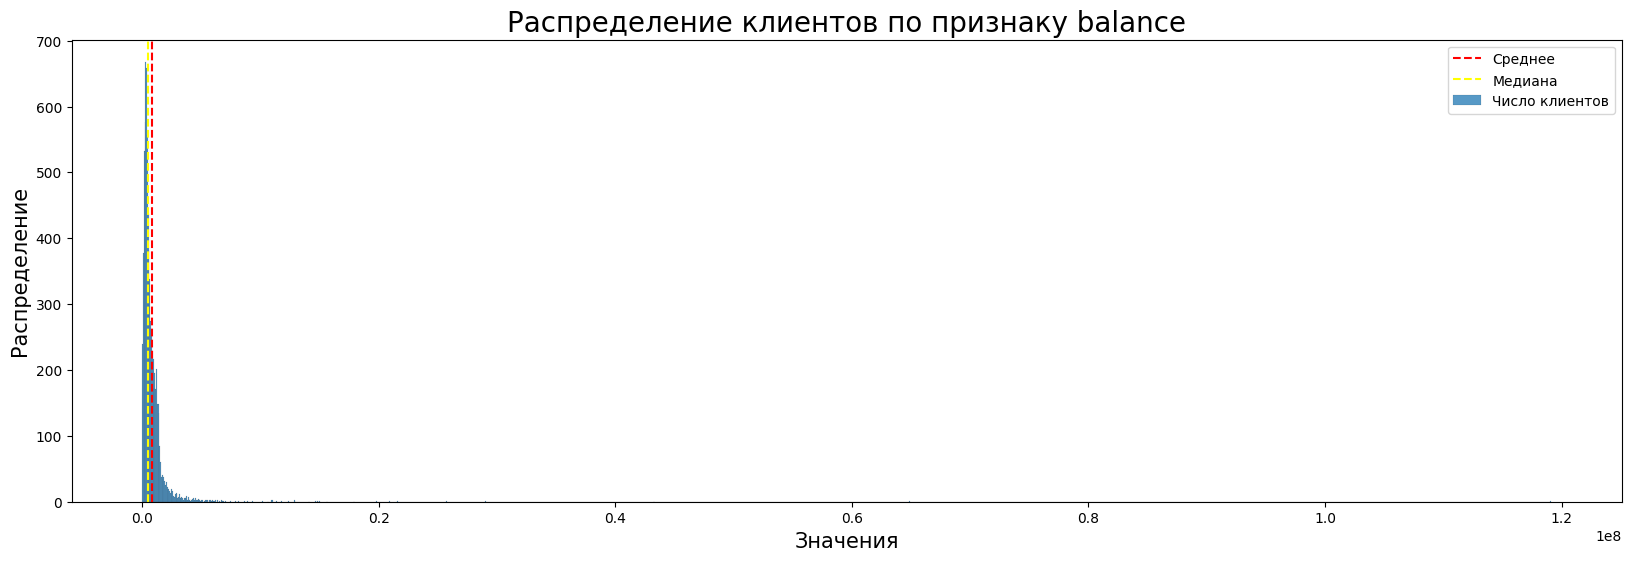

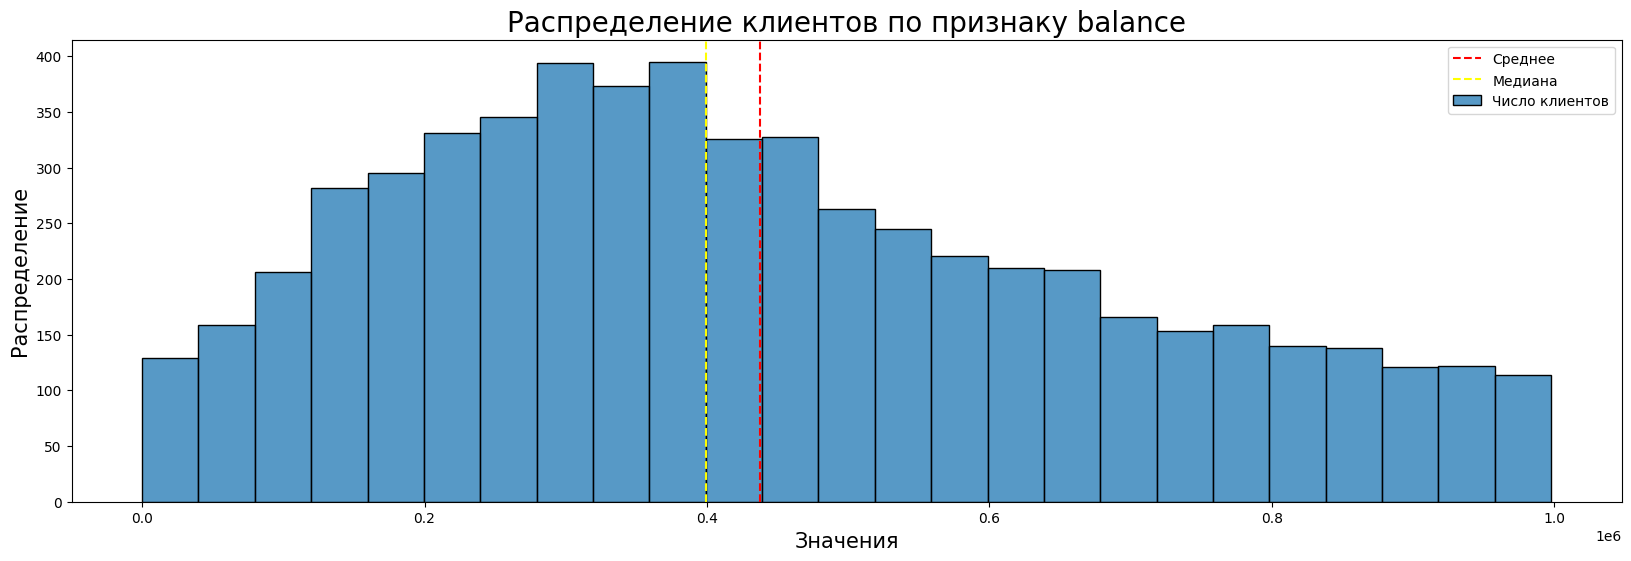

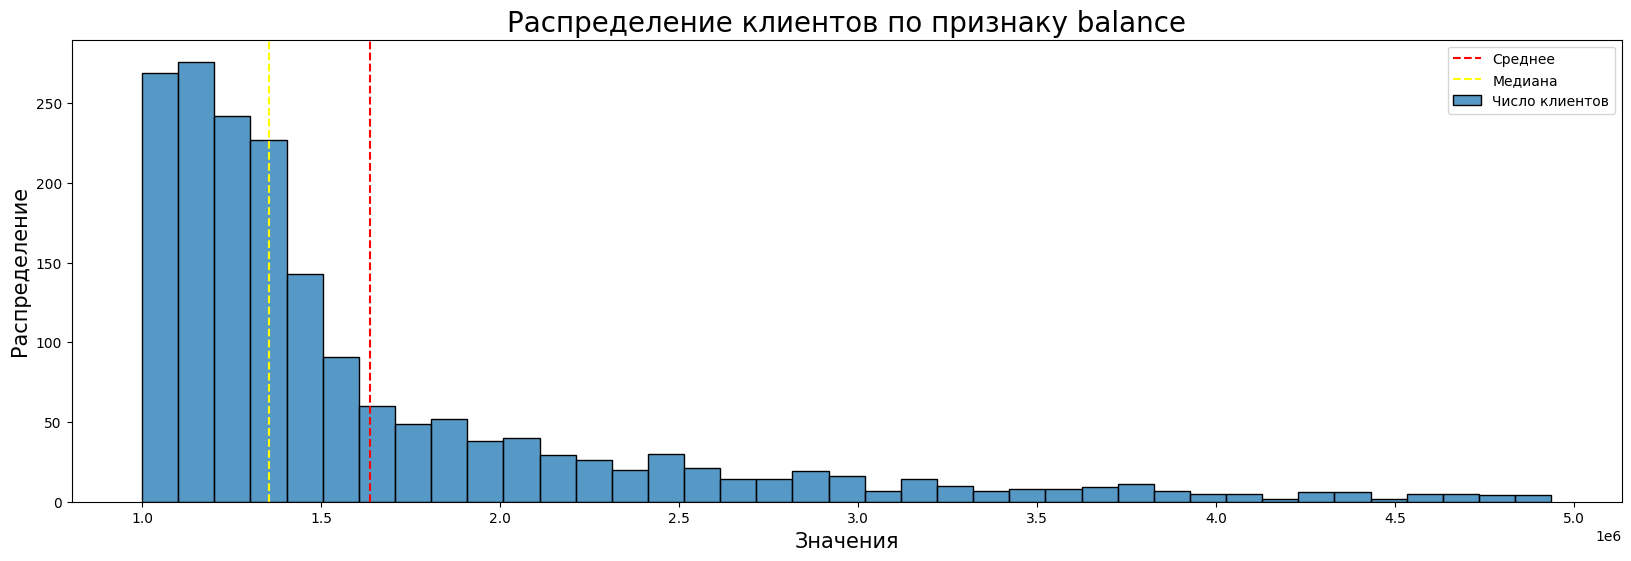

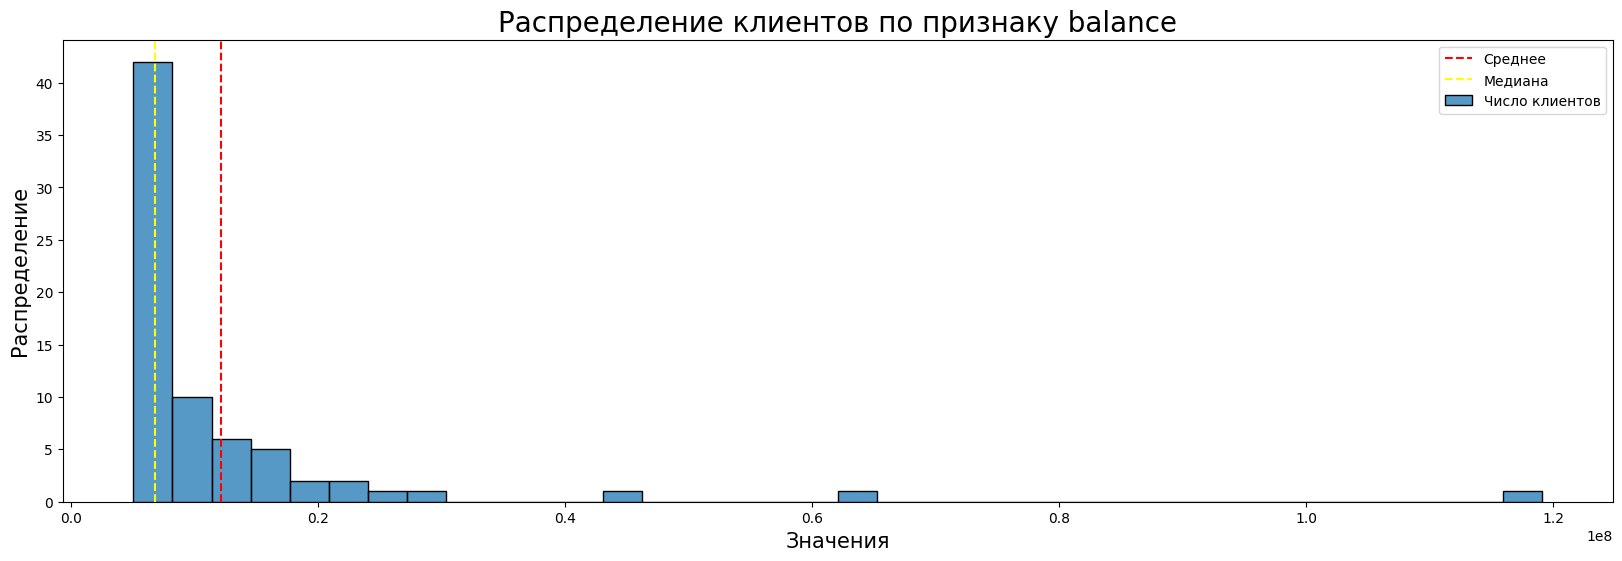

In [79]:
# Сначала рассмотрим количественное распределение
stat = 'count'
legend = ['Среднее', 'Медиана','Число клиентов']
# Общий график
tables(df,'balance', hue = None) 
# Графики с отделенными хваостами
tables(df.query('balance <= 1e+06'),'balance', hue = None) 
tables(df.query('balance > 1e+06 and balance <= 5e+06'),'balance', hue = None) 
tables(df.query('balance > 5e+06'),'balance', hue = None) 

In [80]:
df['balance'].describe()

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

- Баланс большинства клиентов держится в диапазоне 200-500 тыс. рублей. 
- 75% клиентов имеют до 1 млн. рублей на счетах.
- Среднее существенно смещено относительно медианы, так как есть большой хвост с клиентами, имеющими на счетах более 1 млн. рублей.

In [81]:
display(mean_churn('balance'))
median_churn('balance')

,Отток,Среднее
0,Не ушёл,733031.63
1,Ушёл,1134458.21


,Отток,Медиана
0,Не ушёл,475410.09
1,Ушёл,783908.90


В контексте оттока среднее так же сильно смещено относительно медианы. Ушедшие кленты имеют внушительно больший объем средств на счетах, нежели лояльные клиенты.

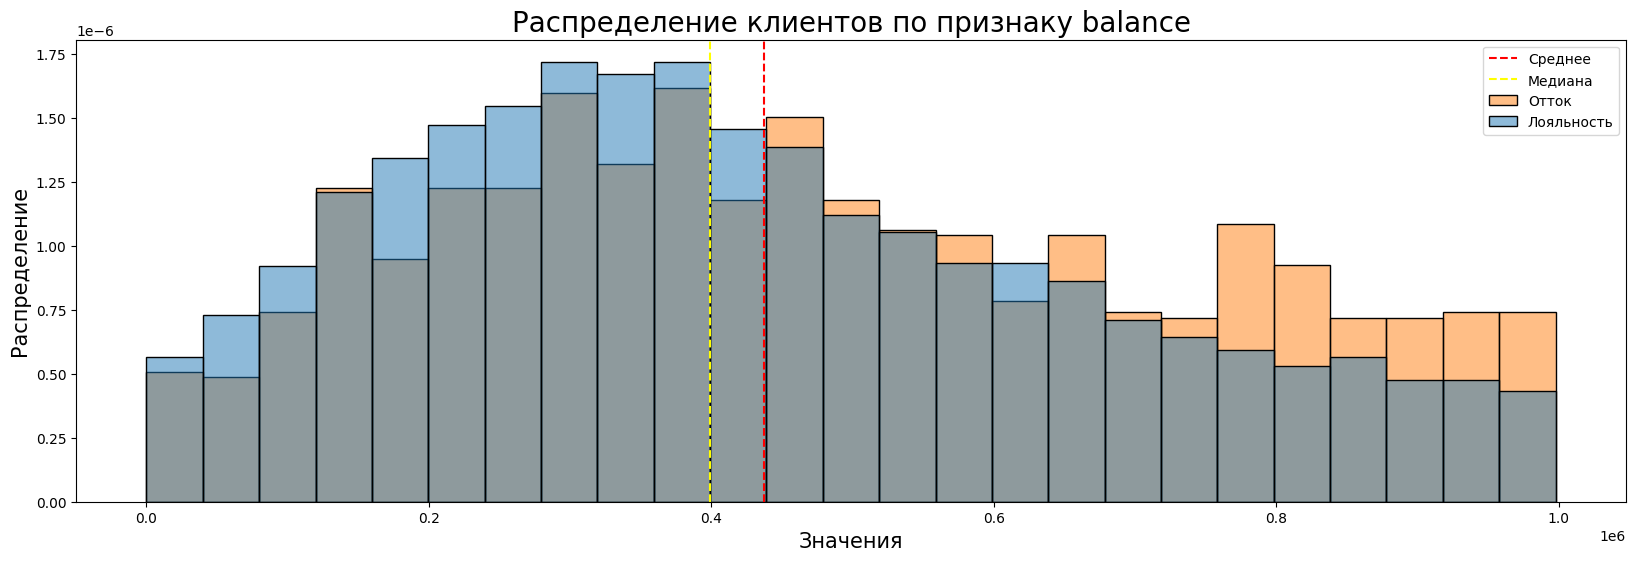

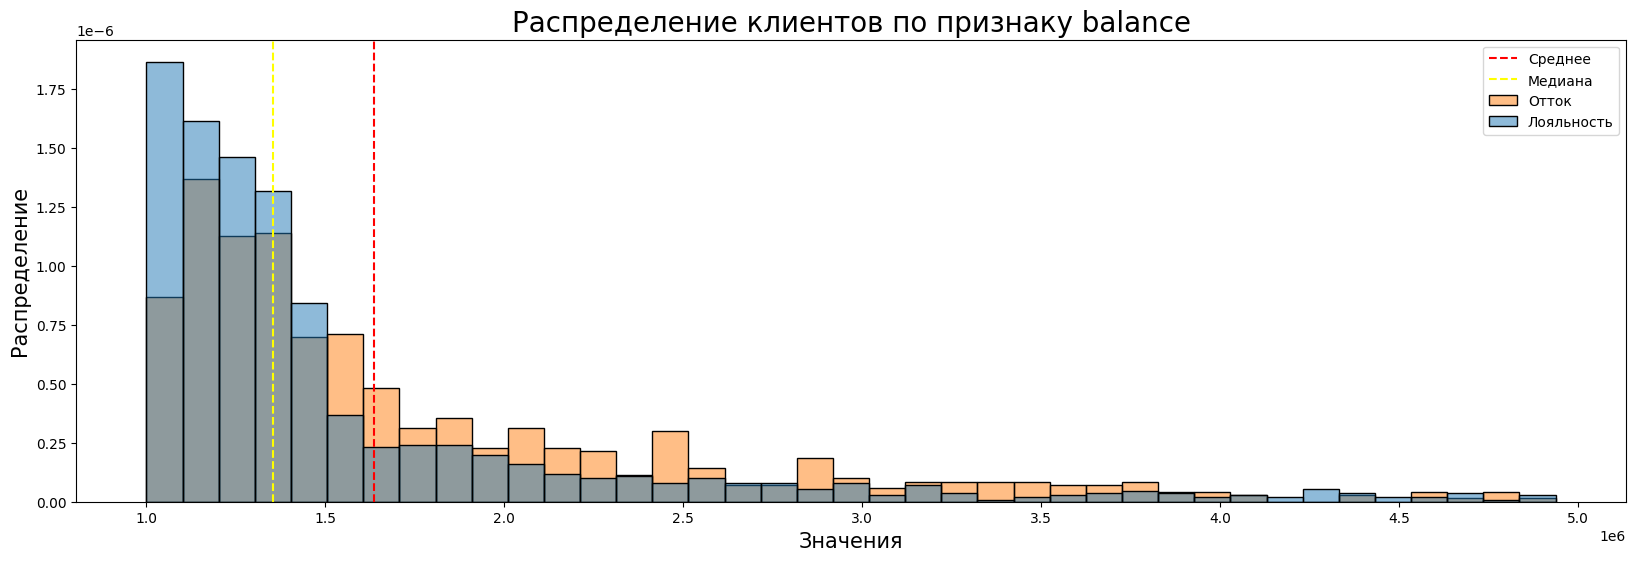

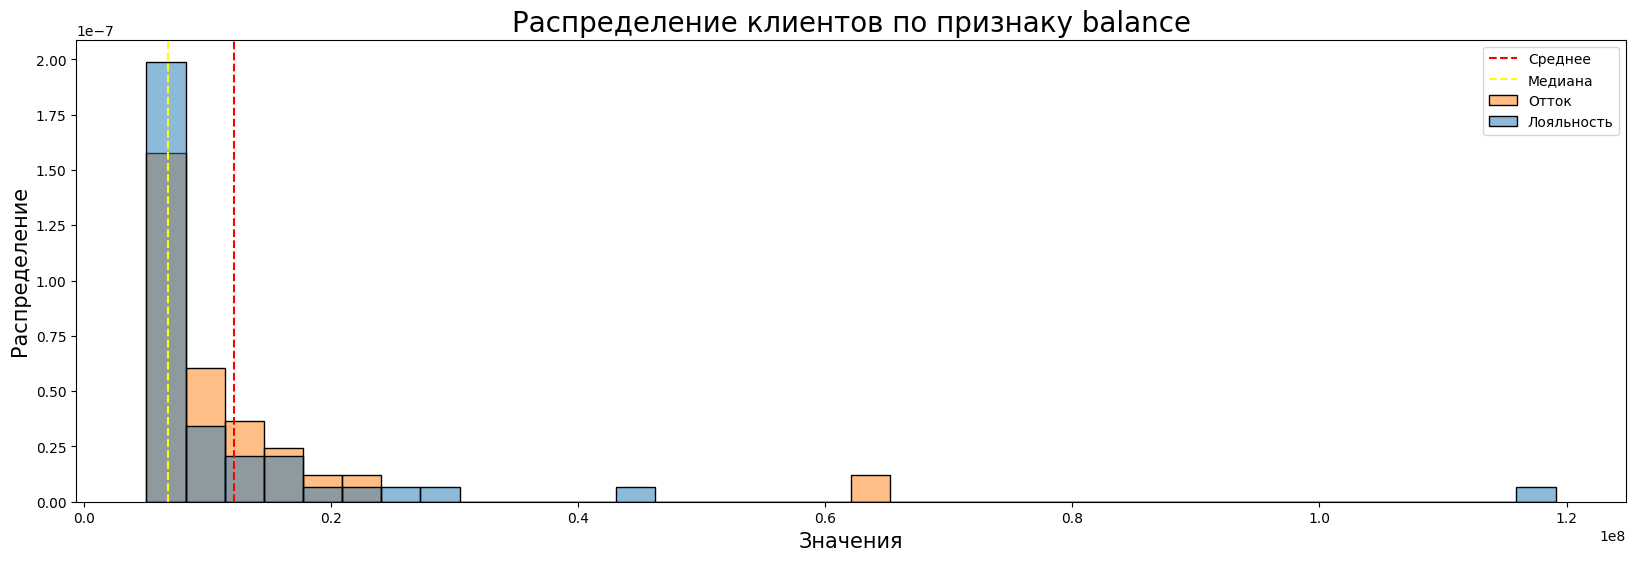

In [82]:
# Теперь смотрим на отток
stat = 'density'
legend = ['Среднее', 'Медиана','Отток', 'Лояльность']
tables(df.query('balance < 1e+06'),'balance', hue = 'churn') 
tables(df.query('balance > 1e+06 and balance < 5e+06'),'balance', hue = 'churn') 
tables(df.query('balance > 5e+06'),'balance', hue = 'churn') 

Отток наблюдается у клиентов с балансом от 450 до 1 млн. рублей, а так же с суммами от 1,5 млн.

#### `score`

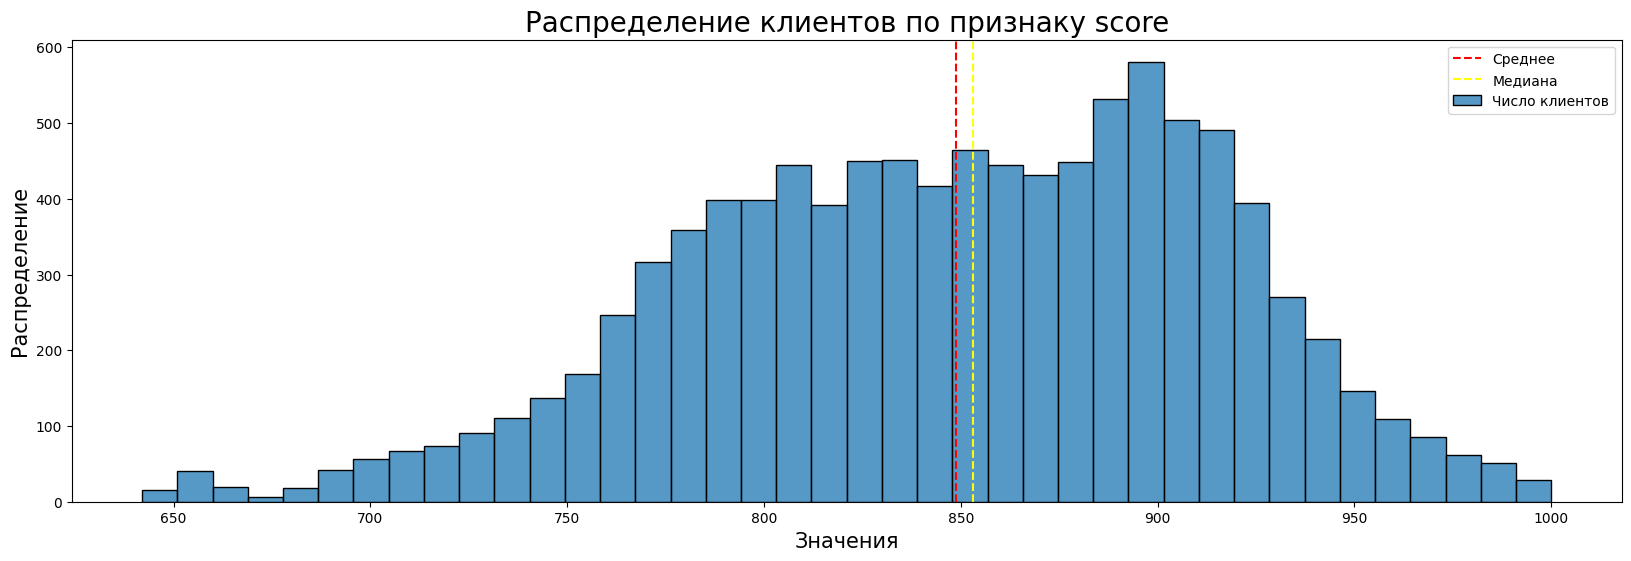

In [83]:
stat = 'count'
legend = ['Среднее', 'Медиана','Число клиентов']
tables(df,'score', hue = None) 

- Основная масса клиентов имеет рейтинг 800-920
- Среднее и медиана держатся близко друг другу.
- Выделяются пользователи с высокими баллами в диапазоне 890-920.

In [84]:
display(mean_churn('score'))
median_churn('score')

,Отток,Среднее
0,Не ушёл,845.40
1,Ушёл,863.36


,Отток,Медиана
0,Не ушёл,848.0
1,Ушёл,866.0


- Средние и медианные значения отличаются друга от друга примерно на 3 балла.
- Разница между лояльными и ушедшими клиентами составляет всего 18 баллов в обоих показателях.

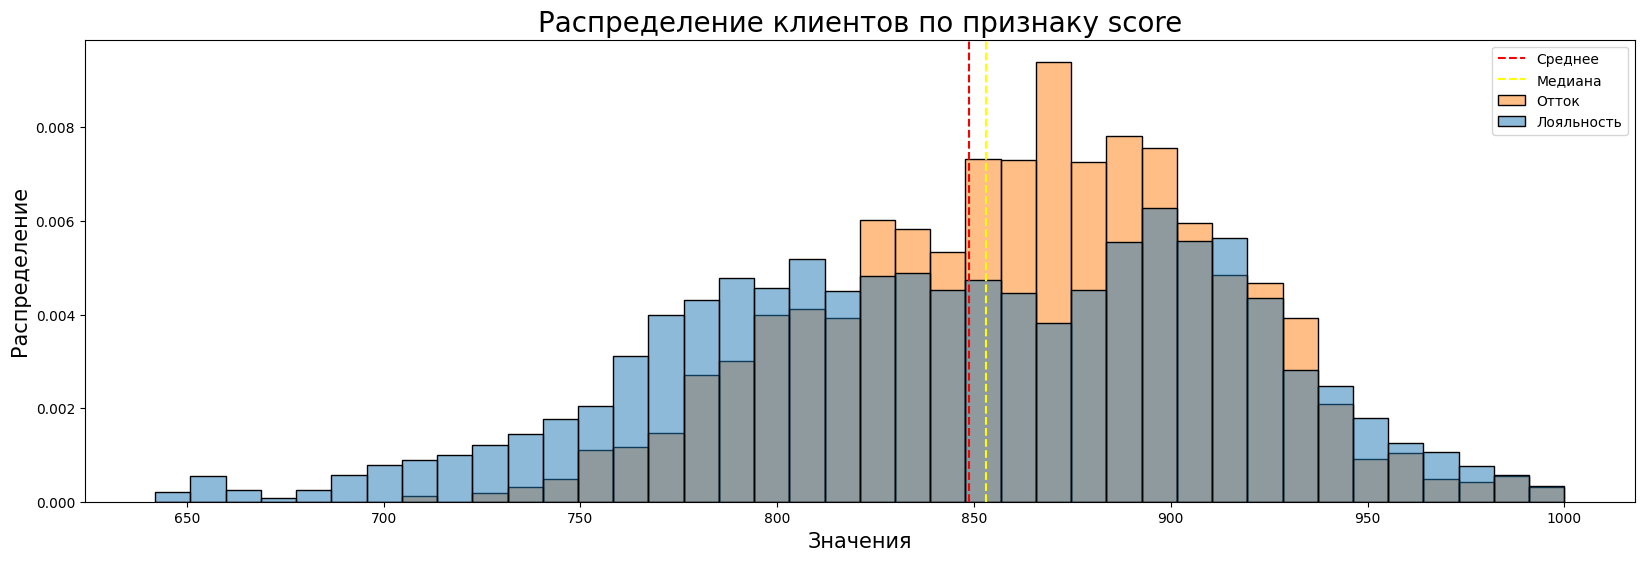

In [85]:
# Посмотрим график распределения лояльных и ушедших клиентов
stat = 'density'
legend = ['Среднее', 'Медиана','Отток', 'Лояльность']
tables(df,'score', hue = 'churn') 

Чаще всех уходят клиенты, имеющие баллы от 820 и до 920. 

#### `est_salary`

Оценочный доход так же разделим на несколько графиков для удобства рассмотрения хвоста.

Делить будем следующим образом:
 - до 200 тыс. (75% клиентов в этом диапазоне)
 - 200 тыс. - 400 тыс. включительно
 - свыше 400. тыс.

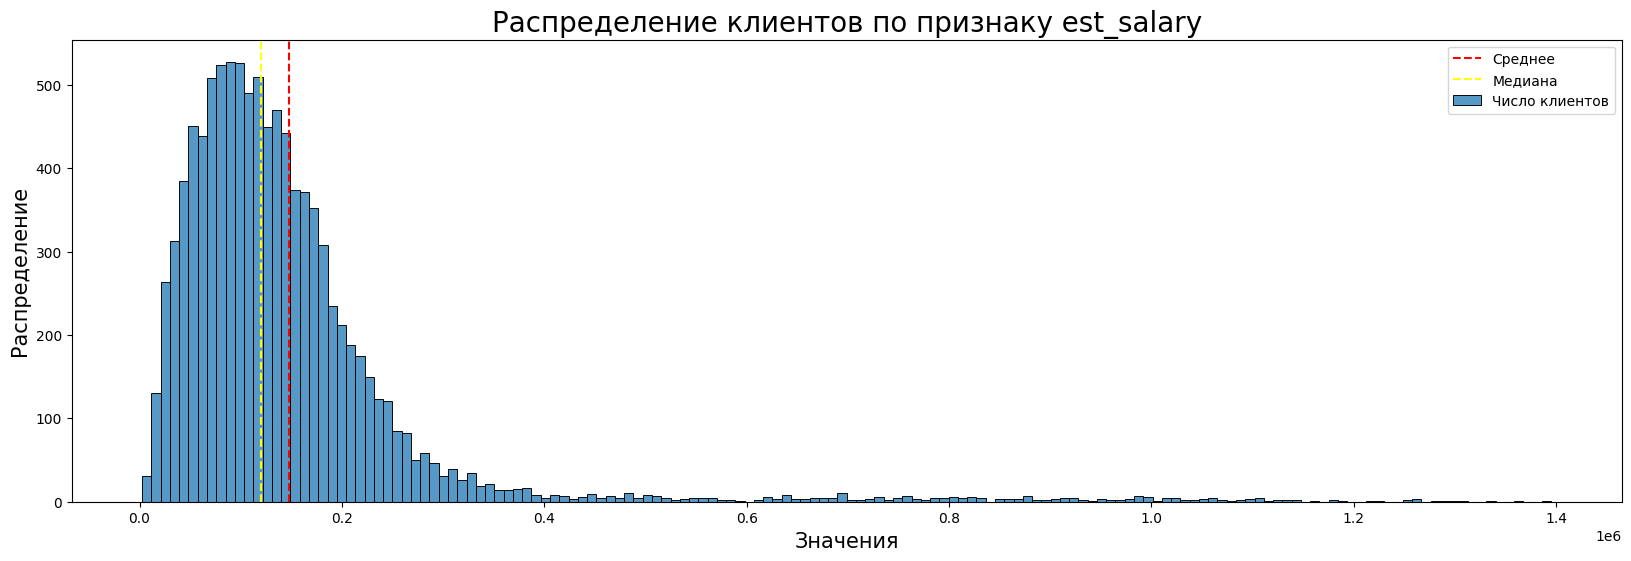

In [86]:
stat = 'count'
legend = ['Среднее', 'Медиана','Число клиентов']
tables(df,'est_salary', hue = None) 

In [87]:
df['est_salary'].describe()

count    9.973000e+03
mean     1.477991e+05
std      1.392871e+05
min      2.546300e+03
25%      7.525202e+04
50%      1.196431e+05
75%      1.745000e+05
max      1.395064e+06
Name: est_salary, dtype: float64

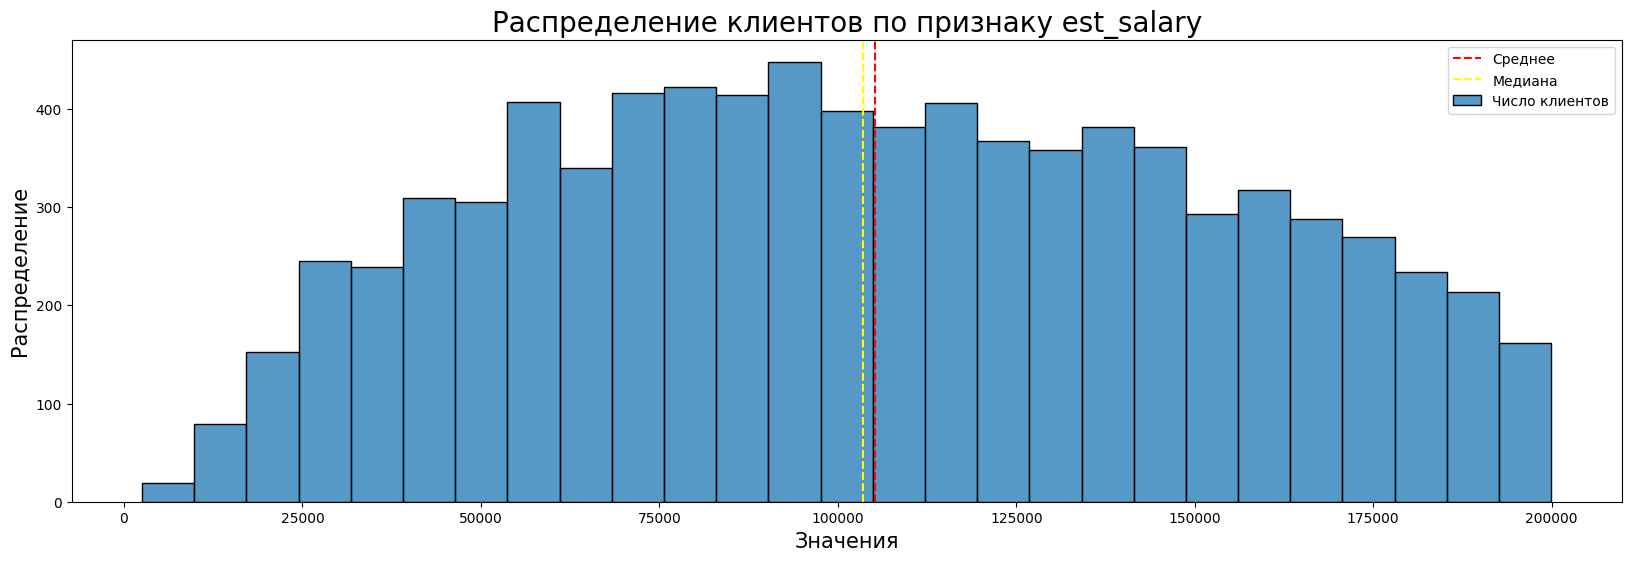

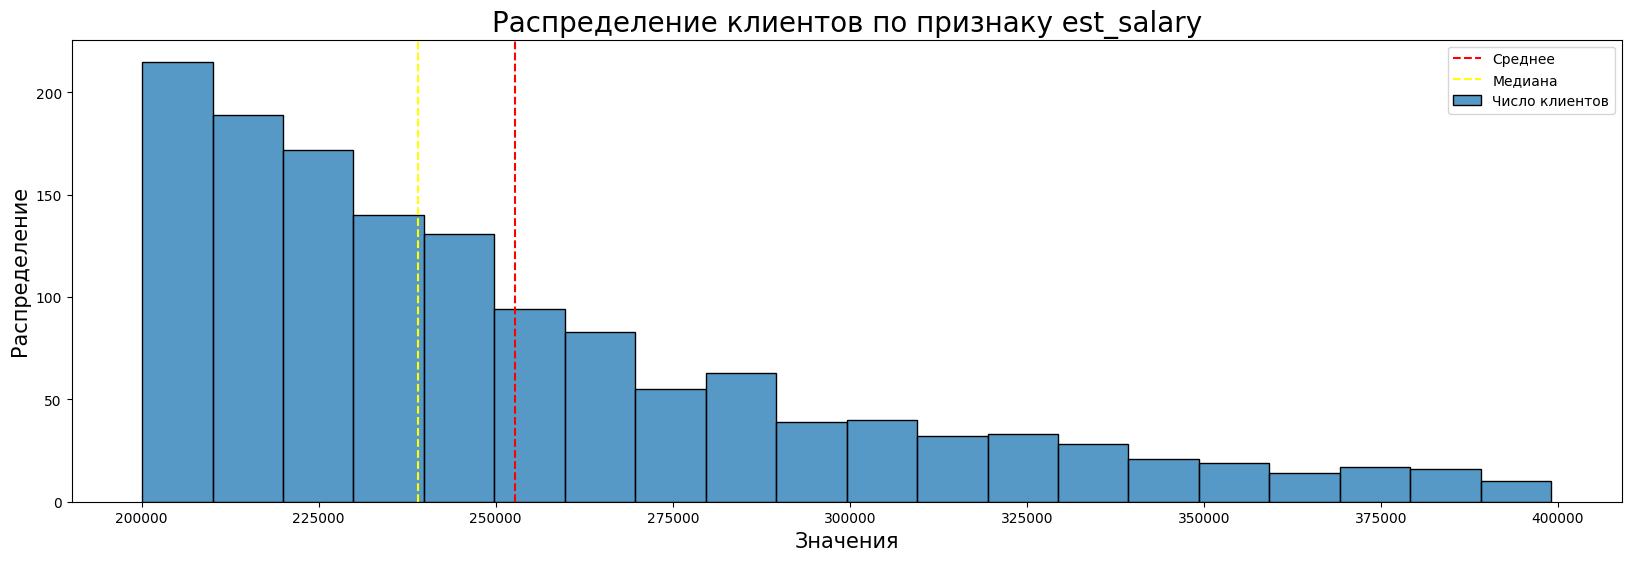

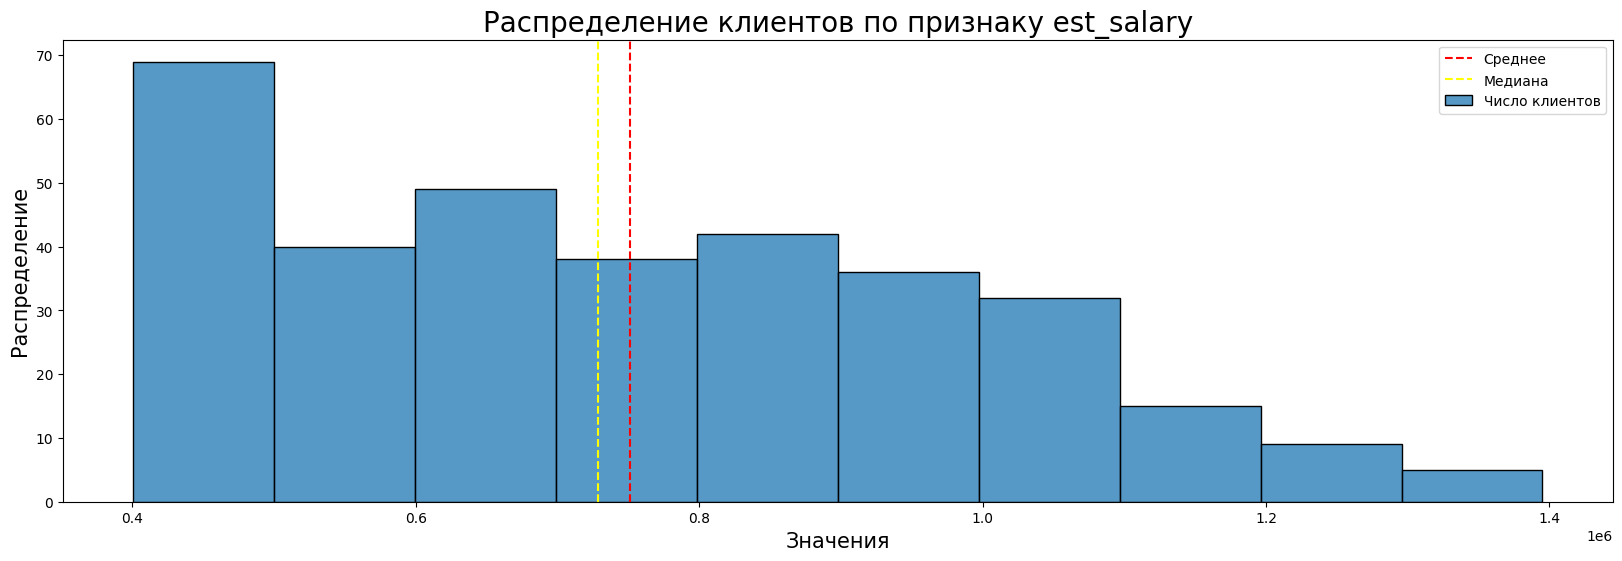

In [88]:
stat = 'count'

tables(df.query('est_salary <= 2e+05'),'est_salary', hue = None) 
tables(df.query('est_salary > 2e+05 and est_salary <= 0.4e+06'),'est_salary', hue = None) 
tables(df.query('est_salary > 0.4e+06'),'est_salary', hue = None) 

- Оценочный доход большинства клиентов составляет до 200 тыс.
- Большой хвост составляют очевидно богатые клиенты, с большим доходом, что не позволяет просто предположить, что это выбросы.

In [89]:
mean_churn('est_salary')

,Отток,Среднее
0,Не ушёл,147674.64
1,Ушёл,148357.48


In [90]:
median_churn('est_salary')

,Отток,Медиана
0,Не ушёл,118227.60
1,Ушёл,125408.88


Средние и медианные значения в группах примерно одинаковые, что говорит о том, что клиенты в хвосте тоже склонны к уходу.

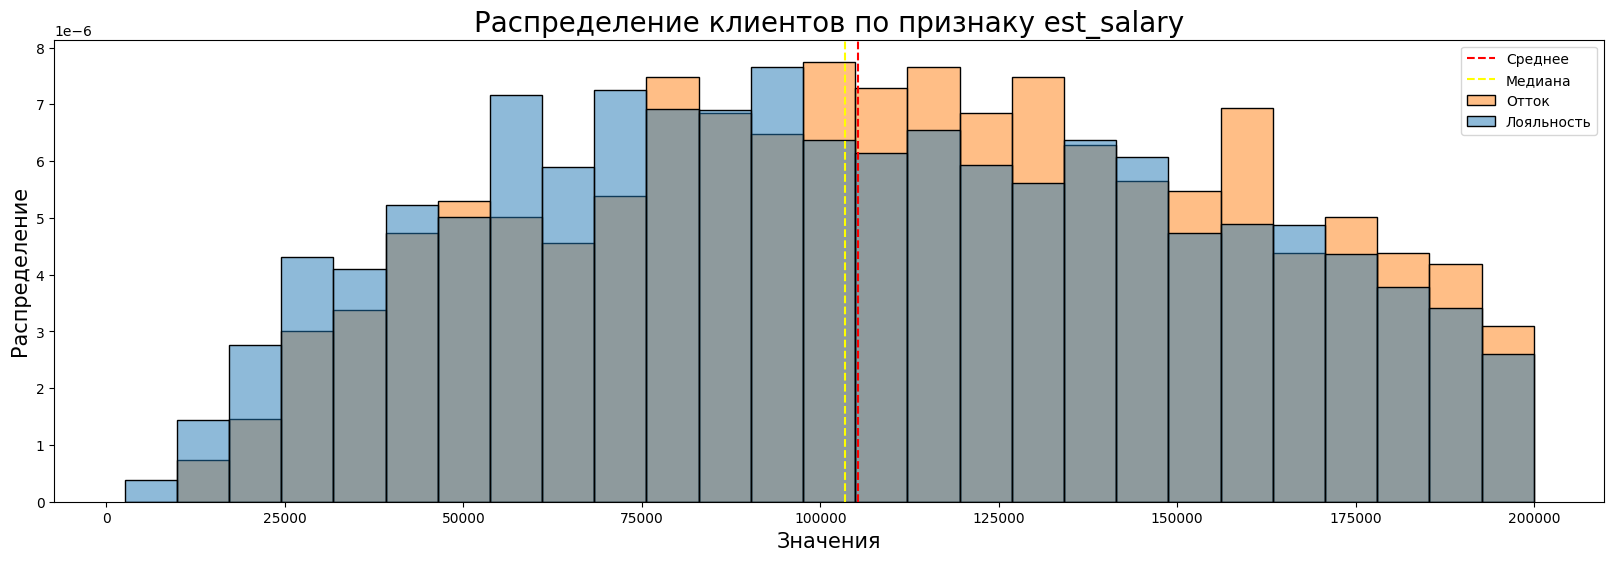

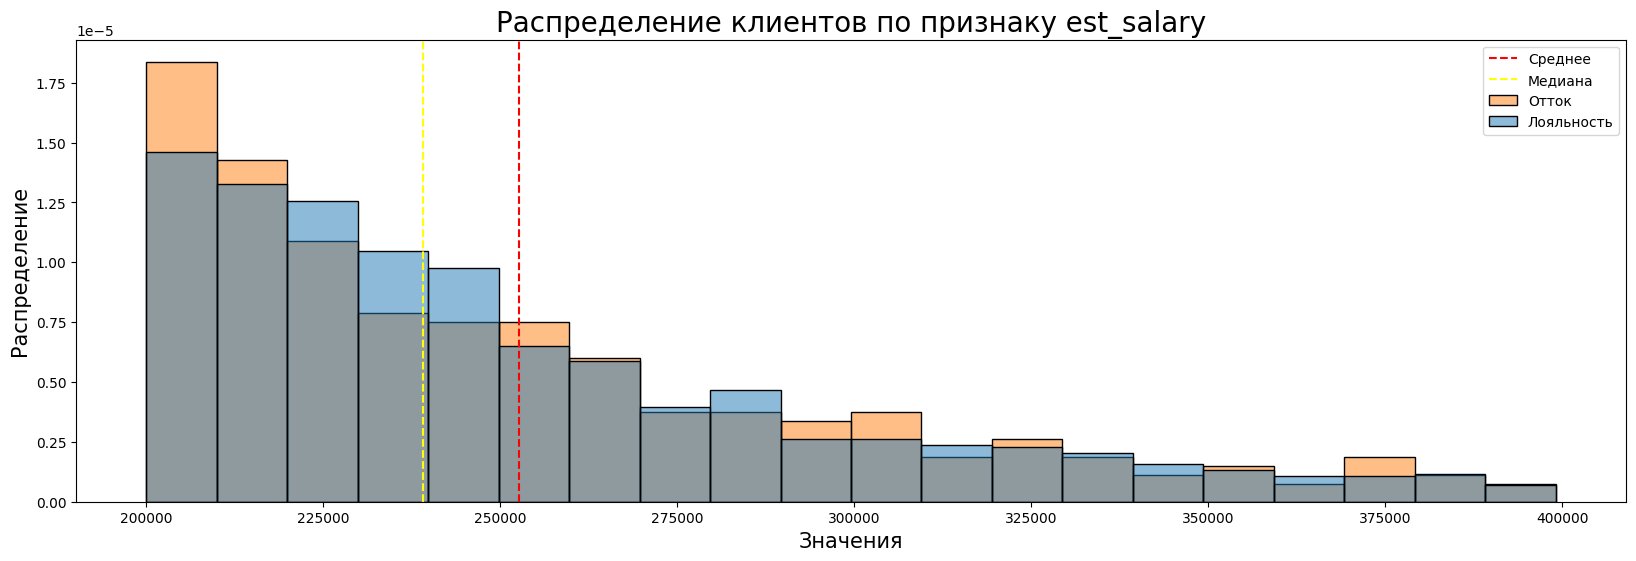

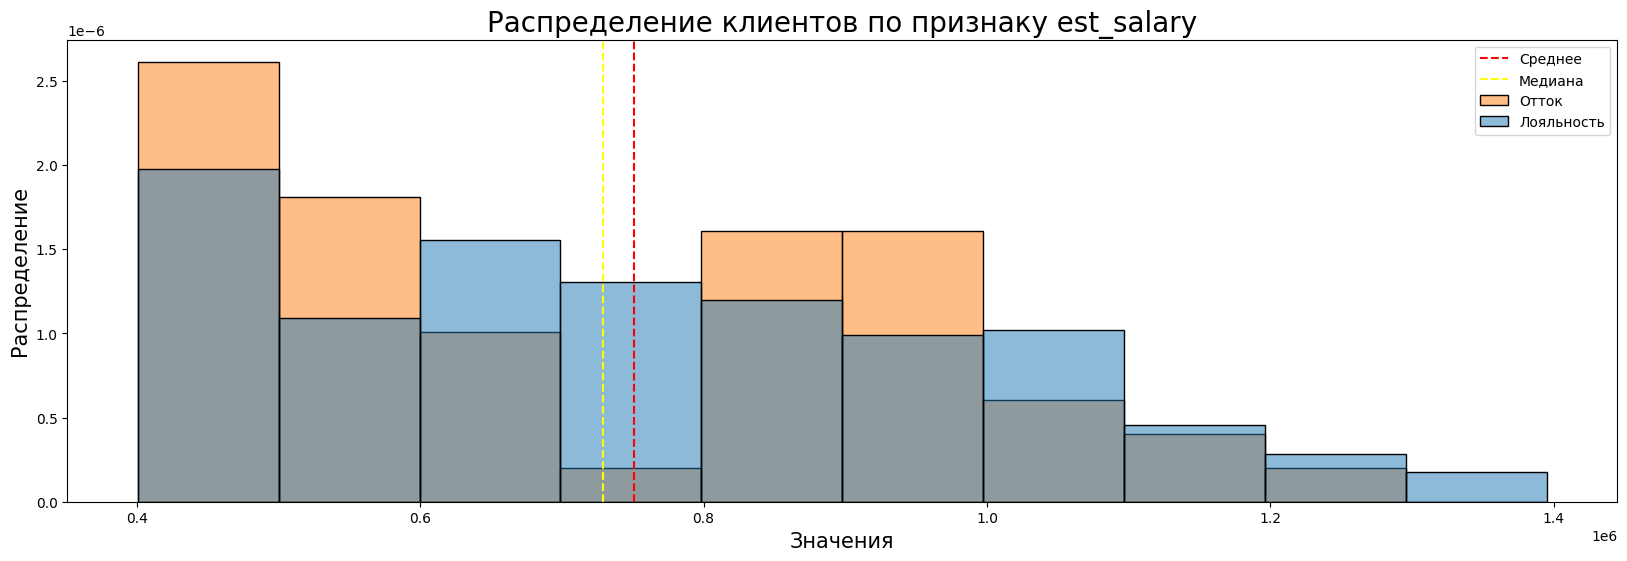

In [91]:
stat = 'density'
legend = ['Среднее', 'Медиана','Отток', 'Лояльность']
tables(df.query('est_salary <= 2e+05'),'est_salary', hue = 'churn') 
tables(df.query('est_salary > 2e+05 and est_salary < 0.4e+06'),'est_salary', hue = 'churn') 
tables(df.query('est_salary > 0.4e+06'),'est_salary', hue = 'churn') 

По графикам видно, что значительный отток начинается у клиентов с оценочным доходом выше 100 тыс. После 200 тыс. нет четкой картины - с увеличением дохода отток  происходит неравномерно.

### Вывод по анализу признаков

Анализ признаков, в том числе в разрезе оттока позволяет составить типичные портреты лояльных и ушедших клиентов.

#### Портрет лояльного клиента



- Женщина;
- Возраст от 30 до 50 лет;
- Оценка собственности около 4 и ниже;
- Использует  до 3х продуктов банка;
- Имеет кредитную карту;
- Малая активность в банке в последнее время;
- Баланс на счетах до 500 тыс., при этом так же есть значения от 1 млн. до 1.5 млн;
- Кредитный рейтинг до 820 или выше 920;
- Доход до 100 тыс.

#### Портрет ушедшего клиента

- Мужчина;
- Возраст 25-35 лет и 50-60;
- Оценка собственности выше 4;
- Использует больше 2х продуктов;
- Не имеет кредитной карты;
- Наблюдается активность в банке в последнее время;
- Баланс выше от 500 тыс. до 1 млн. и так же от 1.5 млн;
- Кредитный рейтинг в диапазоне 820 - 920;
- Доход выше 100 тыс;

Распределение оттока по городам примерно одинаковое.

### Корреляция

Посмотрим, какие есть взаимосвязи между признаками. Использую метод phik

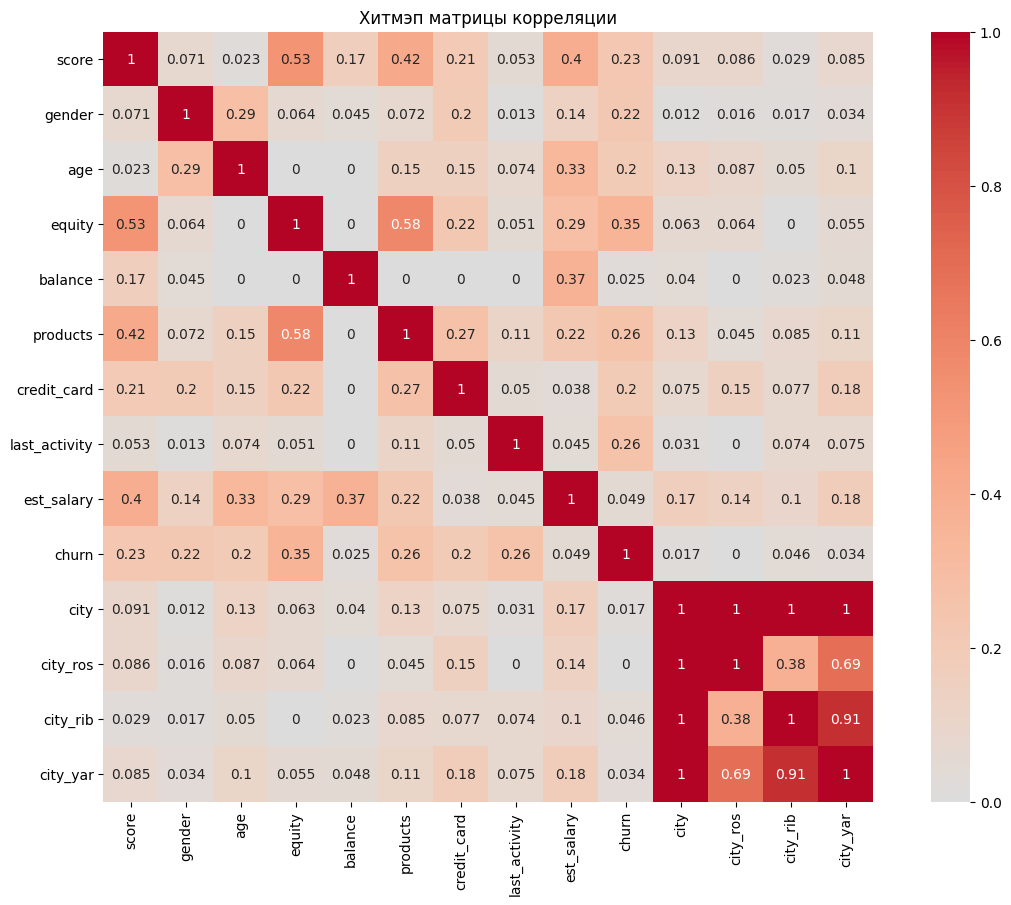

In [92]:
#построим и отрисуем матрицу корреляций
cm = df.drop(['user_id'],axis = 1).phik_matrix(interval_cols=['balance','est_salary','score'])
plt.figure(figsize=(15,10))

# #нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, 
            annot=True, 
            square=True,
            cmap='coolwarm', 
            center = 0)
ax = plt.gca()
ax.set_title('Хитмэп матрицы корреляции');
plt.show();

 Оценивать корреляции буду по шкалле Чеддока, где
- 0,1 - 0,3	Слабая
- 0,3 - 0,5	Умеренная
- 0,5 - 0,7	Заметная
- 0,7 - 0,9	Высокая
- 0,9 - 1,0 Весьма высокая


- Пар с весьма высокой и высокой корреляциями у нас нет.

Посмотрим на некоторые выделяющиеся пары признаков:

__Заметная корреляция__ (0.5 - 0.7) наблюдается у пар:
  -  `score` - `equity` 0.53 - кредитный рейтинг связан с числом баллов ответственности. Возможно баллы ответственности получены на основании недвижимости, за которую выплачена ипотека например, что в свою очередь благоприятно влияет на скоринг
  - `equity` - `products` 0.58 - высокооценненные клиенты возможно имеют различные элементы собственности, для каждой из которых возможно нужни свои банковские услуги, самое высокое значение.
  
  
__Умеренная корреляция__ (0.3 - 0.5) наблюдается у пар:
  -  `score` - `products` 0.42 - большой кредитный рейтинг позвоялет пользоваться большим числом продуктов на более выгодныъ условиях
  - `score` - `est_salary` 0.4 - кредитный рейтинг и оценочные доход имеют определенную связь, так как для выдачи кредита необходима информация о доходе клиента.
  - `balance` - `est_salary` 0.37 - некоторая связь имеется, возможно в этом банке клиент получает заработную плату.
  

__Слабая корреляция__ (0.1 - 0.3) наблюдается у всех пар с `city`, `gender`, и `last_activity`.
- При этом для Ярославля `city_yar` характерна самая высокая из всех городов (0.18) связь с `est_salary`, `products`,`credit_card`

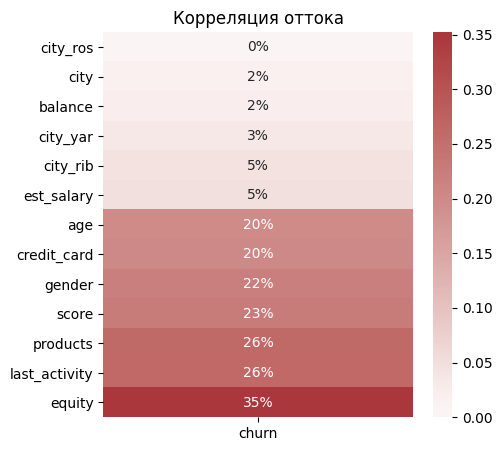

In [93]:
# Дополнительно построим хитмеп для столбца churn
cm = df.drop(['user_id'],axis = 1).phik_matrix(interval_cols=['balance',
                                                              'est_salary',
                                                              'score']) 
plt.figure(figsize=(5,5))
# #нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap((cm.loc[:,['churn']]
               .drop('churn')
               .sort_values('churn')), 
             annot=True, 
             fmt = ".0%", 
             cmap = 'vlag', 
             center = 0)
ax = plt.gca()
ax.set_title('Корреляция оттока');
plt.show();

Анализируем столбец `churn`

 - Умеренная корреляция с признаком (35%).
 - Корреляция с признаками `balance`,`est_salary`, а так же признаками городов близка к нулю (до 5%) либо нулевая.
 - `age`,`credit_card` связаны слабо (20%)
 - С остальными признаками (`gender`,`score`,`last_activity`,`products`) корреляция слабая (в диапазоне от 22 до 26%)

Из всех признаков на отток влияет количество продуктов, оценка собственности и недавняя активность. При этом стоит учесть результаты анализа этих признаков:
- Клиенты с самыми большими оценками и количеством продуктов составляли довольно маленькие группы по численности, что может ставить под сомнение репрезентативность результатов.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9973 entries, 0 to 9972
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int32  
 2   gender         9973 non-null   int32  
 3   age            9973 non-null   int32  
 4   equity         9973 non-null   int64  
 5   balance        7695 non-null   float64
 6   products       9973 non-null   int64  
 7   credit_card    9973 non-null   int64  
 8   last_activity  9973 non-null   int64  
 9   est_salary     9973 non-null   float64
 10  churn          9973 non-null   int64  
 11  city           9973 non-null   object 
 12  city_ros       9973 non-null   uint8  
 13  city_rib       9973 non-null   uint8  
 14  city_yar       9973 non-null   uint8  
dtypes: float64(2), int32(3), int64(6), object(1), uint8(3)
memory usage: 847.4+ KB


## Проверка гипотез

Проверим некоторые гипотезы

### Гипотеза №1

Проверяем гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.



- Н0 - Между доходами лояльных и ушедших клиентов __различий нет__.
- Н1 - Между доходами лояльных и ушедших клиентов __различия есть__.

Для начала проверю данные `est_salary` на близость к нормальному распределению.
Для этого посмотрю значения ассиметрии и эксцессса.
Если значения параметров будут выходить за пределы диапазаона (-2;2), значит распределение данных отличается от нормального распределения.


In [95]:
print('Значение ассиметрии -',df['est_salary'].skew())
print('Значение эксцесса -',df['est_salary'].kurtosis())

Значение ассиметрии - 4.099904165931711
Значение эксцесса - 22.268979390661773


Значения выходят за пределы установленного диапазона, поэтому применение параметрических критериев неэффективно. Поэтому будем применять U-тест Манна-Уитни

In [96]:
# Задам две выборки для проверки гипотезы
a = df[df['churn'] == 1]['est_salary']
b = df[df['churn'] == 0]['est_salary']
print('Количество значений в выборке а:', a.mean())
print('Количество значений в выборке b:', b.mean())
print('Количество значений в выборке а:', a.median())
print('Количество значений в выборке b:', b.median())

Количество значений в выборке а: 148357.48315731573
Количество значений в выборке b: 147674.63788105457
Количество значений в выборке а: 125408.88
Количество значений в выборке b: 118227.6


In [97]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(a, b)

print('Значение статистики: ', results.statistic)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Значение статистики:  7830548.0
p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу


Hа имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу в пользу альтернативной. 

In [98]:
print('Различие между средними значениями в группах:',round((((a.mean()/b.mean())-1)*100),2),'%')

Различие между средними значениями в группах: 0.46 %


Несмотря на то, что различия статистически значимые, абсолютная разница между средними значениями не превышает 0.4%, с экономической точки зрения существенные различия между группами отсутствуют. Разработка дифференцированной политики для данных групп клиентов с точки зрения доходов нецелесообразна, потому что они относятся к одному сегменту по доходам.

#### Дополнительный тест для гипотезы №1

In [99]:
results = st.ttest_ind(a, b, equal_var = False)

alpha =  0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.8354803526840116
Не получилось отвергнуть нулевую гипотезу


Hа имеющихся данных, на уровне значимости 5%, нет оснований отвергнуть нулевую гипотезу в пользу альтернативной. 
- Получается. что два разных теста дают разные результаты.
- U-test отвергает нулевую гипотезу,а T-test не отвергает.
- Основываясь на данных асимметрии и эксцесса приоритет отдам U-тесту.

### Гипотеза №2

Проверяем гипотезу различия кредитных рейтингов ушедших и лояльных клиентов, чья оценка собственности была выше 5 баллов.

- Н0 - Между кредитными рейтингами лояльных и ушедших клиентов с оценкой выше 5 баллов  __различий нет__.
- Н1 - Между кредитными рейтингами лояльных и ушедших клиентов с оценкой выше 5 баллов  __различия есть__.

In [100]:
print('Значение ассиметрии:',df['score'].skew())
print('Значение эксцесса:',df['score'].kurtosis())

Значение ассиметрии: -0.3171587222127579
Значение эксцесса: -0.2865429463435012


- Значения ассиметрии и эксцесса близки к нулю, можно предположить, что распределение близко к нормальному. 
- Для проверки гипотезы применю T-тест

In [101]:
# Задам две выборки для проверки гипотезы
c = df[(df['churn'] == 0) & (df['equity'] > 5)]['score']
d = df[(df['churn'] == 1) & (df['equity'] > 5)]['score']
print('Среднее в выборке c:', c.mean())
print('Среднее в выборке d:', d.mean())
print('Медиана в выборке c:', c.median())
print('Медиана в выборке d:', d.median())
# print('Размер выборки c:', c.count())
# print('Размер выборки d:', d.count())

Среднее в выборке c: 855.1963190184049
Среднее в выборке d: 885.9907407407408
Медиана в выборке c: 855.0
Медиана в выборке d: 886.5


In [102]:
results = st.ttest_ind(c, d, equal_var = False)

alpha =  0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.3280661033786305e-08
Отвергаем нулевую гипотезу


In [103]:
print('Различие между средними значениями в группах:',round((((c.mean()/d.mean())-1)*100),2),'%')
print('Различие между медианными значениями в группах:',round((((c.median()/d.median())-1)*100),2),'%')

Различие между средними значениями в группах: -3.48 %
Различие между медианными значениями в группах: -3.55 %


Hа имеющихся данных, на уровне значимости 5%, есть основания отвергнуть нулевую гипотезу в пользу альтернативной. 

Различия в кредитных рейтингах ушедших клиентов с высокой оценкой собственности и низкой имеются. Фактическая разница составляет 3,5%.

### Вывод:


- Нулевая гипотеза (H0) - это утверждение о том, что нет различий между сравниваемыми группами. 
- Альтернативная гипотеза (H1) - это утверждение о том, что есть различия между сравниваемыми группами.

Были сформулированы гипотезы и альтернативы к ним:


- Для первой гипотезы:
  - Н0 - Между доходами лояльных и ушедших клиентов __различий нет__.
  - Н1 - Между доходами лояльных и ушедших клиентов __различия есть__.
  
- Для второй гипотезы:
  - Н0 - Между кредитными рейтингами лояльных и ушедших клиентов с оценкой выше 5 баллов  __различий нет__.
  - Н1 - Между кредитными рейтингами лояльных и ушедших клиентов с оценкой выше 5 баллов __различия есть__.


Перед началом проверки определил значения ассиметрии и эксцесса. Для данных первой гипотезы значения оказались за пределами диапазона (-2;2), из чего сделал вывод, что распределение этих данных отличается от нормального. По этой причине для первой гипотезы применял критерий Манн-Уитни. Ассиметрия и эксцесс данных для второй гипотезы оказались близки к нулю, что позволило предпололожить близость распределения к нормальному. Таким образом для второй гипотезы применял Т-критерий.
Дополнительно для первой гипотезы провел T-test, который показал противоположный результат U-тесту. Основываясь на данных ассиметри и эксцесса приоритет отдал тесту Манн-Уитни.

Для __первой__ гипотезы на имеющихся данных, на уровне значимости 5%, __были__ основания отвергнуть нулевую гипотезу в пользу альтернативной. Несмотря на значимость, показанную при проведении теста, фактическая разница между доходами оказалась всего 0.4%.

Для __второй__ гипотезы на имеющихся данных, на уровне значимости 5%, __были__ основания отвергнуть нулевую гипотезу в пользу альтернативной. Здесь фактическое различие так же небольшое. всего 3,5%

## Сегментация клиентов

На основе анализа признаков составим несколько сегментов пользователей.
Условия для формирования сегментов
- Уровень оттока должен быть минимум в 2 раза выше среднего по банку, который составляет 18.2 %
- Количество клиентов в сегменте 300-2000 человек.


In [104]:
def segment(condition):
    seg = df.query(condition)
    print('Значение оттока в сегменте:',round((seg['churn'].mean()*100)),'%')
    print('Количество клиентов в сегменте:',seg['user_id'].count())

In [105]:
df.churn.sum()

1818

__Сегмент №1__

In [106]:
seg_1 = segment('balance > 500000 and \
                 age >= 50 \
                 and gender == 1')
seg_1

Значение оттока в сегменте: 45 %
Количество клиентов в сегменте: 509


В основу сегмента заложены следующие условия:
- Возраст от 50 лет
- Мужчины
- Баланс на счетах больше 500 тыс.

Вторая возрастная группа с ушедшими клиентами. Целесообразно упор сделать на выгодные условия по хранению средств. 
Так же можно предложить пенсионерам определить данный банк для получения пенсии.

__Сегмент №2__

In [107]:
seg_2 = segment('820 <= score <= 920 \
                 and est_salary > 150000 \
                 and balance > 500000')
seg_2

Значение оттока в сегменте: 43 %
Количество клиентов в сегменте: 875


В основу сегмента заложены следующие условия:
- Кредитный рейтинг в диапазоне 820-920
- Оценочный доход больше 150 тыс.
- Баланс на счетах больше 500 тыс.

Для уходящих клиентов данного сегмента целесообразно предложить более выгодные условия для хранения средств. 

На основе высокого кредитного рейтинга можно предложить более выгодные условия предоставляения кредитов.

__Сегмент №3__

In [108]:
seg_3 = segment('25 <= age <= 40 and products >= 3')
seg_3

Значение оттока в сегменте: 42 %
Количество клиентов в сегменте: 742


В основу сегмента заложены следующие условия
- Возрастная группа до 40 лет
- Наличие более 3х продуктов.

Возможными причинами оттока может является неудовдетворительное обслуживание по продуктам, отсутствие инноваций. 
Либо политика банка изменилась и условия перестали быть выгодными для клиентов. Необходимо ввести новый услуги или продукты привлекательными условиями.
Исходя из возсратной категории предложить можно следующие услуги
- Бесплатное обслудживание карт для молодых людей до 25 лет.
- Для молодых семей льготные условия по ипотеке.
- Выгодные условия для оформления накопительных счетов для оплаты учебы например.

__Сегмент №4__

In [109]:
seg_1 = segment('equity > 4 and credit_card == 0')
seg_1

Значение оттока в сегменте: 39 %
Количество клиентов в сегменте: 901


В основу сегмента заложены следующие условия
- Оценка собственности выше 4
- Отсутствие кредитной карты

Предложение клиентам завести кредитную карту поможет сократить отток в этом сегменте. Учитывыя высокий балл оценки собственности целесообразно будет так же предложить выгодные условия по кредитам, если в таковых возникнет необходимость.Так же можно предложить страховку имущества.

Вывод:
- Были сформированы 4 сегмента на основе анализа признаков.

- Приоритет следует отдать сегменту №4 с самым высоким процентом оттока - 45%
- Затем стоит рассмотреть сегменты №3  и №2 с процентами оттока - 43% и 42% соответственно.
- Последним можно рассмотреть сегмент №1 с процентом оттока 39%

## Общий вывод:

На основании данных банка "Метанпром" было проведено исследоввание с целью определения причин оттока клиентов. 
Так же необходимо было составить тепичный потрет лояльного и нелояльного клиента.

1. Предобработка

Проведена предобработка данных
- Названия столбцов приведены к нижнему регистру
- Определенные типы столбцов приведен к числовому типу и типу даты.
- Кодированы данные в некоторых категориальых столбцах - пол, город.
- Удалено менее 0.05% пропусков.

Проверка неявных дубликатов выдала наличие 25 пар дубликатов по `user_id`. 
 - Смена городов в парах позволяет предположить, что клиенты закрывают счета в отделении в одном городе, а их номер потом присваивают новому клиенту. На это так же косвенно указывает разница в поле и возрасте.
 - Необходимо уточнить в банке, каким образом происходит переприсовение уникальных номеров, чтобы подтвердить гипотезу.

Так же было исследовано большое количество пропусков в balance. 
- Возможной причиной пропусков может являться то, что исходный датасет собирался по частям и некоторые части данных таблиц могли не войти в конечный датасет
- Необходимо обратиться в банк за уточнением механизмов формирования данных. Возможно после консультации появится возможность либо заполнить пропуски, либо удалить их.

2. Анализ признаков.

Каждый признак был проанализирован в разрезе оттока, что позволило составить типичного отточного и лояльного клиента.

Потрет лояльного клиента:
- Женщина;
- Возраст от 30 до 50 лет;
- Оценка собственности около 4 и ниже;
- Использует  до 3х продуктов банка;
- Имеет кредитную карту;
- Малая активность в банке в последнее время;
- Баланс на счетах до 500 тыс., при этом так же есть значения от 1 млн. до 1.5 млн;
- Кредитный рейтинг до 820 или выше 920;
- Доход до 100 тыс.

Потрет отточного клиента:
- Мужчина;
- Возраст 25-35 лет и 50-60;
- Оценка собственности выше 4;
- Использует больше 2х продуктов;
- Не имеет кредитной карты;
- Наблюдается активность в банке в последнее время;
- Баланс выше от 500 тыс. до 1 млн. и так же от 1.5 млн;
- Кредитный рейтинг в диапазоне 820 - 920;
- Доход выше 100 тыс;

3. Исследование связи оттока с признаками.

Признак оттока был проверен на корреляцию с другими признаками:
 - Умеренная корреляция с признаком (35%).
 - Корреляция с признаками `balance`,`est_salary`, а так же признаками городов близка к нулю (до 5%) либо нулевая.
 - `age`,`credit_card` связаны слабо (20%)
 - С остальными признаками (`gender`,`score`,`last_activity`,`products`) корреляция слабая (в диапазоне от 22 до 26%)

Из всех признаков на отток влияет количество продуктов, оценка собственности и недавняя активность. При этом стоит учесть результаты анализа этих признаков:
- Клиенты с самыми большими оценками и количеством продуктов составляли довольно маленькие группы по численности, что может ставить под сомнение репрезентативность результатов.

4. Проверка гипотез

Были выдвинуты 2 гипотезы и альтернативы к ним:
Гипотеза 1:
- Н0 - Между доходами лояльных и ушедших клиентов __различий нет__.
- Н1 - Между доходами лояльных и ушедших клиентов __различия есть__.

Гипотеза 2:
- Н0 - Между кредитными рейтингами ушедших клиентов с оценкой выше 5 баллов  __различий нет__.
- Н1 - Между кредитными рейтингами ушедших клиентов с оценкой выше 5 баллов  __различия есть__.

Для проверки первой гипотезы был применен u-test, с уровнем значимости 5%, для второй - t-test, с тем же уровнем значимости.

5. Сегментация клиентов.

На основе анализа оттока были сформированы сегменты клиентов с уровнем оттока, минимум в 2 раза превышающим общий по банку и сотавлены рекомендации по удержанию.

__Сегмент 1__: количество клиентов: **509 чел.**, процент оттока: **45%**

В основу сегмента заложены следующие условия:
- Возраст от 50 лет
- Мужчины
- Баланс на счетах больше 500 тыс.

Вторая возрастная группа с ушедшими клиентами. Целесообразно упор сделать на выгодные условия по хранению средств. 
Так же можно предложить пенсионерам определить данный банк для получения пенсии.

__Сегмент 2__: количество клиентов: **875 чел.**, процент оттока: **43%**

В основу сегмента заложены следующие условия:
- Кредитный рейтинг в диапазоне 820-920
- Оценочный доход больше 150 тыс.
- Баланс на счетах больше 500 тыс.

Для уходящих клиентов данного сегмента целесообразно предложить более выгодные условия для хранения средств. 

На основе высокого кредитного рейтинга можно предложить более выгодные условия предоставляения кредитов.

__Сегмент 3__: количество клиентов: **742 чел.**, процент оттока: **42%** 

В основу сегмента заложены следующие условия
- Возрастная группа до 40 лет
- Наличие более 3х продуктов.

Возможными причинами оттока может является неудовдетворительное обслуживание по продуктам, отсутствие инноваций. 
Либо политика банка изменилась и условия перестали быть выгодными для клиентов. Необходимо ввести новый услуги или продукты привлекательными условиями.
Исходя из возсратной категории предложить можно следующие услуги
- Бесплатное обслудживание карт для молодых людей до 25 лет.
- Для молодых семей льготные условия по ипотеке.
- Выгодные условия для оформления накопительных счетов для оплаты учебы например.

__Сегмент 4__: количество клиентов: **901 чел.**, процент оттока: **39%**

В основу сегмента заложены следующие условия
- Оценка собственности выше 4
- Отсутствие кредитной карты

Предложение клиентам завести кредитную карту поможет сократить отток в этом сегменте. Учитывыя высокий балл оценки собственности целесообразно будет так же предложить выгодные условия по кредитам, если в таковых возникнет необходимость.Так же можно предложить страховку имущества.

Приоритеты следует расставить следующим образом:
- Сегмент **№1** с самым высоким процентом оттока - **45%**
- Затем стоит рассмотреть сегменты **№2**  и **№3** с процентами оттока - **43%** и **42%** соответственно.
- Последним можно рассмотреть сегмент **№4** с процентом оттока **39%**
